In [1]:

# coding: utf-8

# In[346]:


from array import array
import sys
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import math
import csv
import pandas

In [2]:
class Net(object):
    
    def __init__(self, Parameter_Vector):
        Layer_sizes = (3,3,2,1)
        
        self.W1 = Parameter_Vector[0:9].reshape(3,3)
        self.b1 = Parameter_Vector[9:12].reshape(3,1)
        self.W2 = Parameter_Vector[12:21].reshape(3,3)
        self.b2 = Parameter_Vector[21:24].reshape(3,1)
        self.W3 = Parameter_Vector[24:30].reshape(3,2)
        self.b3 = Parameter_Vector[30:32].reshape(2,1)
        self.W4 = Parameter_Vector[32:34].reshape(2,1)
        self.b4 = Parameter_Vector[34:35]
        
        
def Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector):
    Net_ = Net(Parameter_Vector)
    return Net_

Parameter_Vector = np.random.rand(35)
Net4 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector)


In [3]:
def Run_Through_Nural_Network_for_1D_SHO(Net,X):
    Z1 = np.dot(Net.W1.T,X) + Net.b1
    A1 = 1/(1 + np.exp(-Z1))
    

    Z2 = np.dot(Net.W2.T,A1) + Net.b2
    A2 = 1/(1 + np.exp(-Z2))
    

    Z3 = np.dot(Net.W3.T,A2) + Net.b3
    A3 = 1/(1 + np.exp(-Z3))
    
    A4 = np.dot(Net.W4.T,A3) + Net.b4
    
    return A4


In [4]:
def Square_difference_Cost_Function(Y_predict,Y_true):

    CostFunction = np.sum((Y_predict-Y_true)**2)
    return CostFunction

In [5]:
def Genetic_Algorithm_Optimizer_for_for_1D_SHO(Initial_Parameter_Vector):

    Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    
    

In [6]:
def Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_Nural_Network_for_1D_SHO(Net1,Phase_Space_time_samples) + Run_Through_Nural_Network_for_1D_SHO(Net2,Phase_Space_time_samples)
    
#     print( Phase_Space_time_samples)
#     print( Hamiltonian_Samples)
#     print(np.shape(Hamiltonian_Samples))
#     print(Hamiltonian_Samples[0,1],Hamiltonian_Samples[0,0])
#     print(Hamiltonian_Samples[0,3],Hamiltonian_Samples[0,2])
    
    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    


In [7]:
def Create_predicted_path(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[0:35])
    Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[35:70])

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [8]:
def Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted):
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((p_true - p_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((p_true - p_predicted)/(dp_true - dp_predicted)))

    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor1*np.sum((dp_true - dp_predicted)**2)

    Loss = Loss1 + Loss2
    return Loss

2.245533605998759


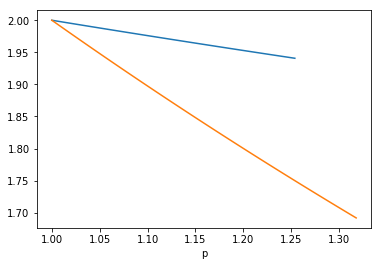

In [9]:
Individuals_Parameter_Vector = np.random.rand(70,20)
T_total = 10
First_two_phase_space_samples = np.array([[1,1.1],[2,1.1],[0,0.1]])


q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Individuals_Parameter_Vector[:,1],First_two_phase_space_samples,T_total)
q_true, p_true, dq_true, dp_true = Create_predicted_path(Individuals_Parameter_Vector[:,2],First_two_phase_space_samples,T_total)

Loss = Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.xlabel("q")
plt.xlabel("p")
print(Loss)

In [10]:

class Hamiltonians(object):
    
    def __init__(self):
        m = 1

    def SHO_Hamiltonian(self,Phase_Space_time_samples):
#         m = 1
#         k = 1
#         x = Phase_Space_time_samples[1,:]
#         p = Phase_Space_time_samples[2,:]   

#         Hamiltonian_Samples = (p**2)/(2*m) + (x**2)*k/2
        
        m = 1
        GM = 2
        l = 1.3
#         Number_Of_Samples = len(Phase_Space_time_samples[1,:])
        x = Phase_Space_time_samples[1,:]
        p = Phase_Space_time_samples[2,:]    

        Hamiltonian_Samples = (p**2)/(2*m) + (l**2)/(2*m*(x**2)) - GM*m/x
        
        return         Hamiltonian_Samples 
    
    
def Calculate_Hamiltonian_for_1D_SHO_(Phase_Space_time_samples):
    Hamiltonian_for_1D_SHO_ = Hamiltonian_for_1D_SHO(Phase_Space_time_samples)
    return Hamiltonian_for_1D_SHO_



Phase_Space_time_samples = np.random.rand(4,3)
H = Hamiltonians()
print(H.SHO_Hamiltonian(Phase_Space_time_samples))

[  1.22932943 115.37001064   5.0388557 ]


In [21]:
def Create_true_path(First_two_phase_space_samples,T_total):

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]


    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])



    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dp_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    p_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    p_true[0] = Initial_conditions[1]
    
    H = H = Hamiltonians()
    dq_true[0], dp_true[0] = Create_True_Hamiltonian_paths(H,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        p_true[i] = p_true[i-1] + dp_true[i-1]
        dq_true[i], dp_true[i] = Create_True_Hamiltonian_paths(H,np.array([q_true[i],p_true[i]]),dt,dq_true[i-1],dp_true[i-1],T_total)

    return q_true, p_true, dq_true, dp_true

In [22]:
def Create_True_Hamiltonian_paths(H,Curent_state,dt,dq,dp,T_total):

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])
    Sample3 = np.array([t[i],Curent_state[0] ,Curent_state[1] - dp/2])               
    Sample4 = np.array([t[i],Curent_state[0] ,Curent_state[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = H.SHO_Hamiltonian(Phase_Space_time_samples)

    dp_true  = -(Hamiltonian_Samples[1] - Hamiltonian_Samples[0])*dt/dq
    dq_true  = (Hamiltonian_Samples[3] - Hamiltonian_Samples[2])*dt/dp
    
    return dq_true, dp_true    
    


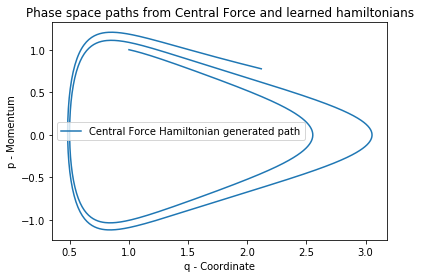

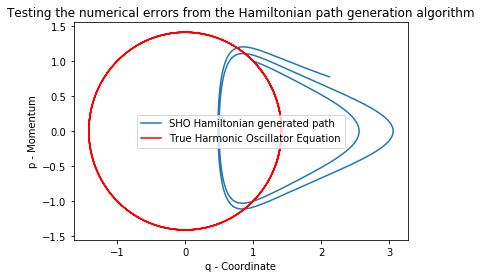

In [116]:
Individuals_Parameter_Vector = np.random.rand(70,20)
T_total = 20

# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])

q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Individuals_Parameter_Vector[:,1],First_two_phase_space_samples,T_total)
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)



Loss = Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)

plt.figure(1)
plt.plot(q_true,p_true)
# plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from Central Force and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["Central Force Hamiltonian generated path"])



dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]



Number_Of_Samples = int(T_total / dt)

t = np.linspace(0,T_total,Number_Of_Samples)

w = 1

A = First_two_phase_space_samples[0,0]
B = First_two_phase_space_samples[1,0]/w

q = A*np.cos(w*t) + B*np.sin(w*t)
p = -A*np.sin(w*t) + w*B*np.cos(w*t)
plt.figure(2)
plt.plot(q_true,p_true)
plt.plot(q,p,'r')
plt.title("Testing the numerical errors from the Hamiltonian path generation algorithm")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","True Harmonic Oscillator Equation"])

CurrentCost is: 423.8579458076659

Now Running Itteration 0 \ 10
the ImprovementItteration is: 2
CurrentCost is: 375.24158622314354

Now Running Itteration 1 \ 10
the ImprovementItteration is: 3
CurrentCost is: 357.1923070034672

Now Running Itteration 2 \ 10
the ImprovementItteration is: 4
CurrentCost is: 325.2557773744827

Now Running Itteration 3 \ 10
the ImprovementItteration is: 5
CurrentCost is: 308.7695545082824

Now Running Itteration 4 \ 10
the ImprovementItteration is: 6
CurrentCost is: 299.90195195300686

Now Running Itteration 5 \ 10
the ImprovementItteration is: 7
CurrentCost is: 289.80894050908034

Now Running Itteration 6 \ 10
the ImprovementItteration is: 8
CurrentCost is: 288.26096204635206

Now Running Itteration 7 \ 10
the ImprovementItteration is: 9
CurrentCost is: 287.8877311171286

Now Running Itteration 8 \ 10
the ImprovementItteration is: 10
CurrentCost is: 284.25796744730485

Now Running Itteration 9 \ 10
the ImprovementItteration is: 11


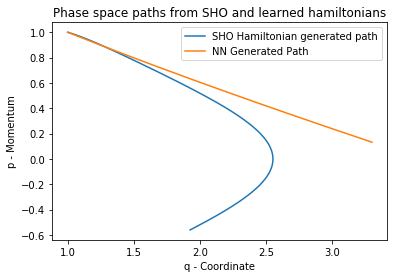

In [25]:
## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    
    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        

        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

            
            
        if np.max(np.max(TargetedSearch)) > 10: ## This is if the change vector is too bid
            print("Applied supression of change vector")
            TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-1)

            for sample in range (1,NumberOfSamples):

                TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search)         *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1             *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(InitialParameters)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        

        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

        Cost    = Cost1.Cost_Function(Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print("CurrentCost is:",CurrentCost)
            print("")
            print("Now Running Itteration",i,"\\",Number_Of_Itterations)
            print("the ImprovementItteration is:",ImprovementItteration)
    return Best_Individual







## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
            q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
            Cost_Function1[i] = Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)


        return Cost_Function1
    

# Individuals_Parameter_Vector = np.random.rand(70,20)




## Setting the hyperparameters for two mode
## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =10
Maximal_Random_Search = 0.001
NumberOfSamples = 10 ## This is the number of individuals in each itteration


Number_Of_Itterations = 10
print_Cost = 1


x = 1
y = 1
# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
InitialParameters = np.random.rand(70,1)

T_total = 6
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

T_total = 6
# q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
# InitialParameters = Best_Individual
# Best_Individual = Optimize_With_Two_Mode_Algorithm(x,y,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)


q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Best_Individual,First_two_phase_space_samples,T_total)


plt.figure(3)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



In [26]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



In [64]:
Number_Of_Nurons_in_5_layer_net = np.array([3,6,3,6,1])
TotalParameters_in_5_layer_net = 2*(Number_Of_Nurons_in_5_layer_net[0]*Number_Of_Nurons_in_5_layer_net[1] + \
Number_Of_Nurons_in_5_layer_net[1]*Number_Of_Nurons_in_5_layer_net[2] + \
Number_Of_Nurons_in_5_layer_net[2]*Number_Of_Nurons_in_5_layer_net[3] +\
Number_Of_Nurons_in_5_layer_net[3]*Number_Of_Nurons_in_5_layer_net[4] + np.sum(Number_Of_Nurons_in_5_layer_net))

print("TotalParameters_in_5_layer_net",TotalParameters_in_5_layer_net)

TotalParameters_in_5_layer_net 158


In [71]:
## Defining the 5 layer complex network


class Net5_(object):
    
    def __init__(self, Parameter_Vector, Number_Of_Nurons_in_5_layer_net):
        
        N_0 = 0
        N1 = Number_Of_Nurons_in_5_layer_net[0]
        N2 = Number_Of_Nurons_in_5_layer_net[1]
        N3 = Number_Of_Nurons_in_5_layer_net[2]
        N4 = Number_Of_Nurons_in_5_layer_net[3]
        N5 = Number_Of_Nurons_in_5_layer_net[4]
        
        ## Reshaping into Weights
        self.W1 = Parameter_Vector[N_0 :N_0 + N1*N2].reshape(N1,N2) + \
                    1j*Parameter_Vector[N_0 + N1*N2:N_0 + 2*N1*N2].reshape(N1,N2)
        N_0 += 2*N1*N2     
        
        self.W2 =Parameter_Vector[N_0:N_0 + N2*N3].reshape(N2,N3) + \
                    1j*Parameter_Vector[N_0+ N2*N3:N_0 + 2*N2*N3].reshape(N2,N3)
        N_0 += 2*N2*N3      
        
        self.W3 =Parameter_Vector[N_0:N_0 + N3*N4].reshape(N3,N4) + \
                    1j*Parameter_Vector[N_0+ N3*N4:N_0 + 2*N3*N4].reshape(N3,N4)
        N_0 += 2*N3*N4      

        self.W4 =Parameter_Vector[N_0:N_0 + N4*N5].reshape(N4,N5) + \
                    1j*Parameter_Vector[N_0+ N4*N5:N_0 + 2*N4*N5].reshape(N4,N5)
        N_0 += 2*N4*N5     
        
        self.W5 =Parameter_Vector[N_0:N_0 + N5*1].reshape(N5,1) + \
                    1j*Parameter_Vector[N_0+ N5*1:N_0 + 2*N5*1].reshape(N5,1)
        N_0 += 2*N5*1          
        
        
        ## Reshaping into biases
        self.b1 = Parameter_Vector[N_0 :N_0 + N2].reshape(N2,1) + 1j*Parameter_Vector[N_0 + N2:N_0 + 2*N2].reshape(N2,1)
        N_0 += 2*N2        
        
        self.b2 =  Parameter_Vector[N_0:N_0 + N3].reshape(N3,1) + 1j* Parameter_Vector[N_0 + N3:N_0 + 2*N3].reshape(N3,1)
        N_0 += 2*N3      
        
        self.b3 =  Parameter_Vector[N_0:N_0 + N4].reshape(N4,1) + 1j* Parameter_Vector[N_0 + N4:N_0 + 2*N4].reshape(N4,1)
        N_0 += 2*N4      
        
        self.b4 =  Parameter_Vector[N_0:N_0 + N5].reshape(N5,1) + 1j* Parameter_Vector[N_0 + N5:N_0 + 2*N5].reshape(N5,1)
        N_0 += 2*N5        
        
        self.b5 = Parameter_Vector[N_0:N_0 + 1].reshape(1,1) + 1j*Parameter_Vector[N_0 + 1:N_0 + 2*1].reshape(1,1)
        N_0 += 2*1    
        
def Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net):
    Net_ = Net5_(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
    return Net_




Parameter_Vector = np.random.rand(TotalParameters_in_5_layer_net)
Net5 = Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)

print(Net5.W1.shape)

(3, 6)


In [72]:
def Run_Through_5_layer_Net(Net,X):

        Z1 = np.dot(Net.W1.T,X) + Net.b1
        A1 = np.maximum(Z1.real,0) + 0.1*np.minimum(Z1.real,0) + 1j*(np.maximum(Z1.imag,0) + 0.1*np.minimum(Z1.imag,0))


        Z2 = np.dot(Net.W2.T,A1) + Net.b2
        A2 = np.maximum(Z2.real,0) + 0.1*np.minimum(Z2.real,0) + 1j*(np.maximum(Z2.imag,0) + 0.1*np.minimum(Z2.imag,0))
    
        Z3 = np.dot(Net.W3.T,A2) + Net.b3
        A3 = np.maximum(Z3.real,0) + 0.1*np.minimum(Z3.real,0) + 1j*(np.maximum(Z3.imag,0) + 0.1*np.minimum(Z3.imag,0))        
        
        Z4 = np.dot(Net.W4.T,A3) + Net.b4
#         A4 = np.maximum(Z4,0) + 0.1*np.minimum(Z4,0)
        A4 = np.maximum(Z4.real,0) + 0.1*np.minimum(Z4.real,0) + 1j*(np.maximum(Z4.imag,0) + 0.1*np.minimum(Z4.imag,0))
    
    
        Z5 = np.dot(Net.W4.T,A3) + Net.b5
        A5 = (10**(-3))*Z5.real

        return A5

CurrentCost is: 96.16487097273287

Now Running Itteration 0 \ 20
the ImprovementItteration is: 2
CurrentCost is: 91.72435596753137

Now Running Itteration 1 \ 20
the ImprovementItteration is: 3
CurrentCost is: 90.08036831815582

Now Running Itteration 2 \ 20
the ImprovementItteration is: 4
CurrentCost is: 85.04981445868896

Now Running Itteration 3 \ 20
the ImprovementItteration is: 5
CurrentCost is: 81.6923245888056

Now Running Itteration 4 \ 20
the ImprovementItteration is: 6
CurrentCost is: 79.42225832772269

Now Running Itteration 5 \ 20
the ImprovementItteration is: 7
CurrentCost is: 78.8129939674833

Now Running Itteration 6 \ 20
the ImprovementItteration is: 8
CurrentCost is: 77.82613147907195

Now Running Itteration 7 \ 20
the ImprovementItteration is: 9
CurrentCost is: 77.66178541089923

Now Running Itteration 8 \ 20
the ImprovementItteration is: 10
CurrentCost is: 76.86311773312147

Now Running Itteration 9 \ 20
the ImprovementItteration is: 11
CurrentCost is: 74.62201952808

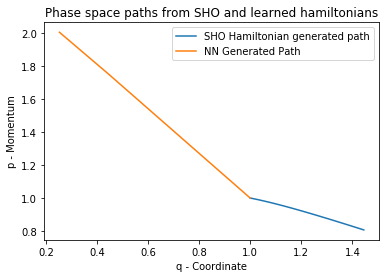

CurrentCost is: 21814.08689549441

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 1219.5239645201348

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 1219.5239645201348

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 805.7835718074032

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 805.7835718074032

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 669.5213764095126

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 596.1136230304195

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 517.0890878290463

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 471.86427862750253

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 455.77528589911657

Now Running Itteration 9 \ 15
the ImprovementItterat

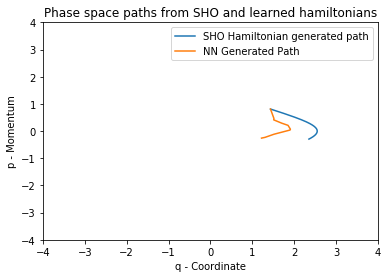

CurrentCost is: 432.0622587659258

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 302.57701581229924

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 302.57701581229924

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 267.88910687227605

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 249.19327089405945

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 244.96664766169945

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 210.7983645036213

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 199.54612581020453

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 199.54612581020453

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 197.37915786083573

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 194.19

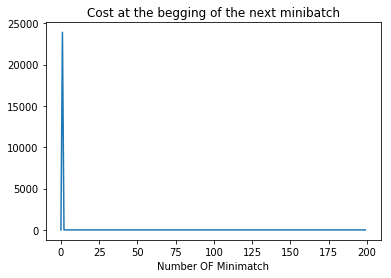

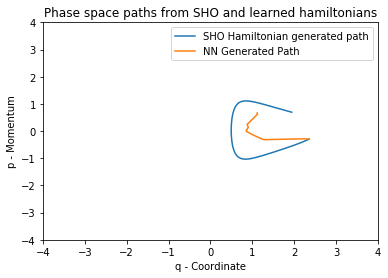

CurrentCost is: 385.93717710906657

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 378.3048015222082

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 194.83032598225157

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 181.6182065585129

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 130.31415551489317

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 77.36177768620855

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 73.19025278946688

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 61.837800599585755

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 61.305761569681636

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 55.83027768465434

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 31.4445

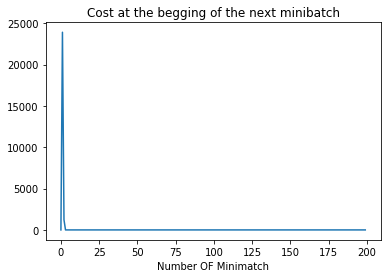

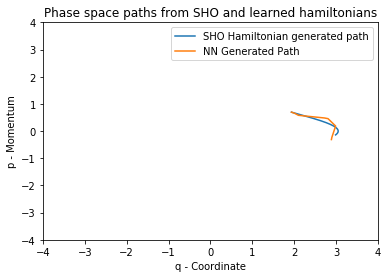

1
CurrentCost is: 319.1334540679344

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 147.60490352168353

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 82.99384698598908

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 77.26040658243515

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 61.734174492480584

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 52.52794281209747

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 49.57313622719228

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 48.96062645973688

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 48.874539886353034

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 46.014608916318295

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 45.377

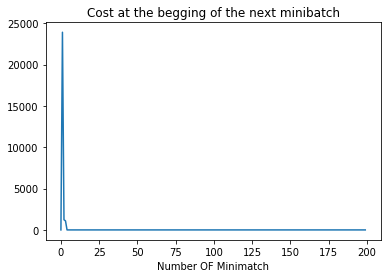

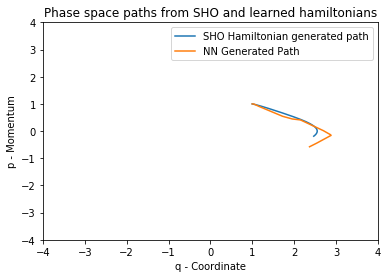

CurrentCost is: 272.5505176137091

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 272.5505176137091

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 220.34515011168708

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 163.74047462613404

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 147.18074979635617

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 147.18074979635617

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 147.18074979635617

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 146.28403442919137

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 145.81338917619306

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 144.87580608655898

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 144.

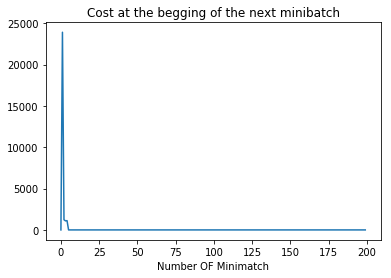

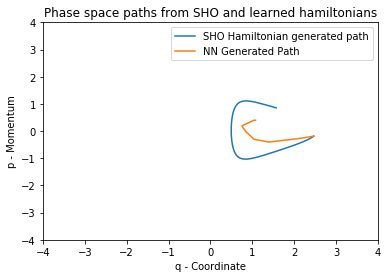

CurrentCost is: 19.782338232630792

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 19.782338232630792

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 19.782338232630792

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 19.782338232630792

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 19.782338232630792

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 19.782338232630792

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 19.296314939380668

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 18.18142307676675

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 17.786390596069033

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 17.06002324792185

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 17.0

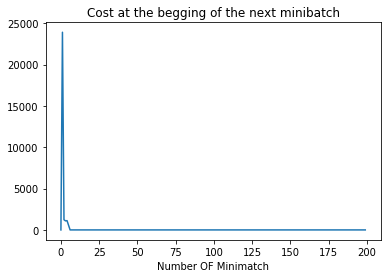

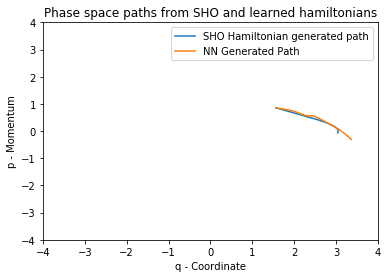

CurrentCost is: 37.652243451037805

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 32.50401849426113

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 24.77246048768301

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 24.77246048768301

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 16.179766862731388

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 15.261591344393453

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 15.261591344393453

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 15.261591344393453

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 14.47045761769517

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 13.35383064606179

Now Running Itteration 9 \ 15
the ImprovementItteration is: 8
CurrentCost is: 13.353830

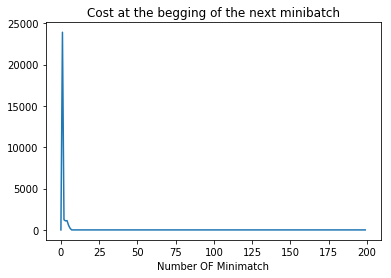

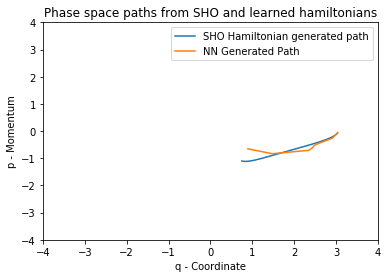

1
CurrentCost is: 289.88074585748757

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 289.88074585748757

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 229.14174415550738

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 124.6023465531128

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 79.2124537997109

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 62.22520099007697

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 54.366328944048476

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 49.1230787050465

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 48.53075645653122

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 44.61506848826551

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 44.61506

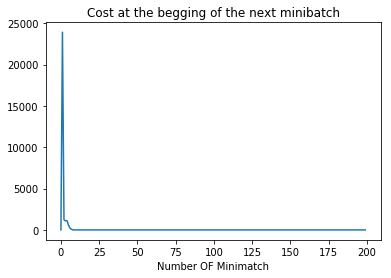

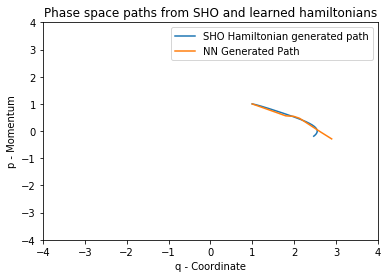

CurrentCost is: 846.838211479293

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 193.8827839087283

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 163.42068710623755

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 162.80419542516276

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 157.8744184427046

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 152.1216355193036

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 149.45934216825614

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 141.1275974937394

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 141.1275974937394

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 138.709694378398

Now Running Itteration 9 \ 15
the ImprovementItteration

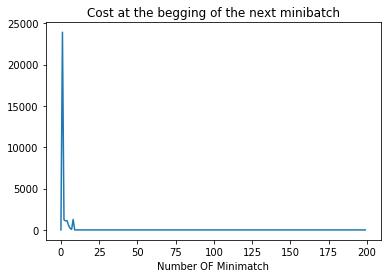

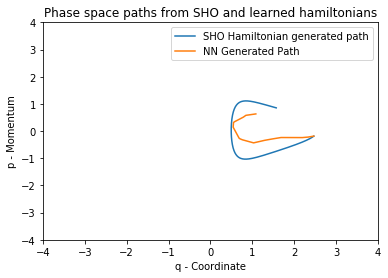

CurrentCost is: 56.96896315355801

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 56.96896315355801

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 56.96896315355801

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 56.96896315355801

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 42.377421142935745

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 23.679771410885724

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 17.364381866851744

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 13.699455973275466

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 12.874338969550411

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 11.096821737166204

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 11.096

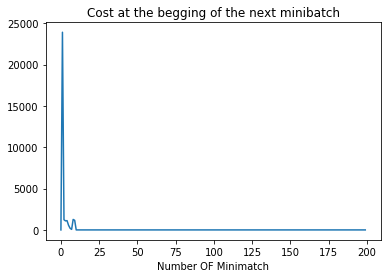

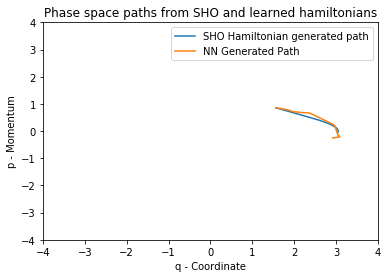

CurrentCost is: 67.37410474208659

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 67.37410474208659

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 25.215120115744206

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 14.189055714183457

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 11.870265179354933

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 8.296345733103689

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 8.296345733103689

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 8.241682043798576

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 7.99086532207003

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 7.939594329864745

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 7.93959432

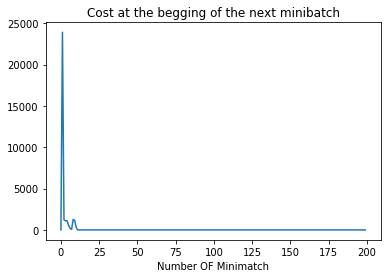

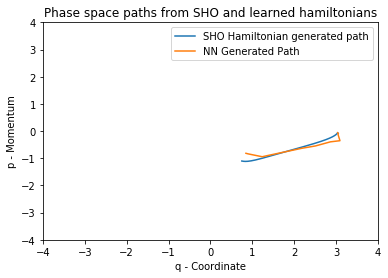

1
CurrentCost is: 135.9256232656386

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 58.106814772348415

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 58.106814772348415

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 29.166881383158554

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 29.166881383158554

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 28.719269067099773

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 28.555723704134667

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 28.555723704134667

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 28.555723704134667

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 27.76577678685807

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 27.1

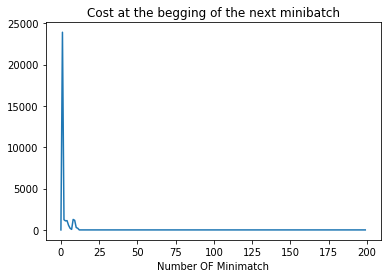

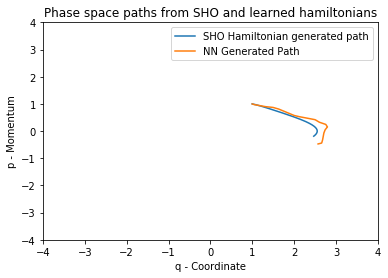

CurrentCost is: 139.40315355443758

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 103.28854741216111

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 103.28854741216111

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 103.28854741216111

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 103.28854741216111

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 103.28854741216111

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 102.94462464052954

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 102.45183537022214

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 101.65327666190107

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 96.59794245135735

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 96.

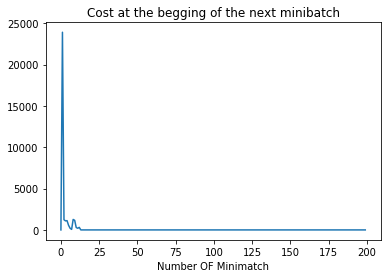

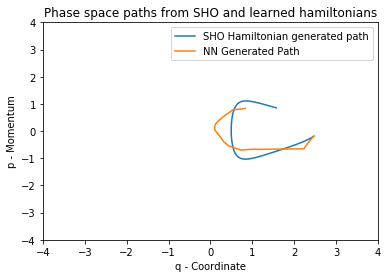

CurrentCost is: 26.558361732468462

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 26.558361732468462

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 15.461196670137538

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 11.284170155851283

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 11.284170155851283

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 11.284170155851283

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 11.284170155851283

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 9.998438580170145

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 9.890753495310651

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 9.889579063025774

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 9.889

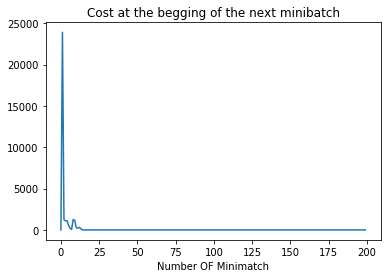

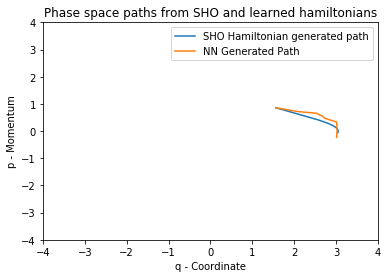

CurrentCost is: 23.244604492105825

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 23.244604492105825

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 23.244604492105825

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 16.651344151044032

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 16.651344151044032

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 13.528836767368986

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 13.528836767368986

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 13.523091929409745

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 13.144712394495706

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 13.144712394495706

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 13

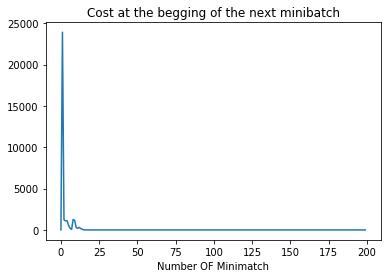

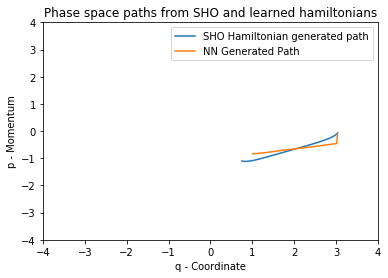

1
CurrentCost is: 288.89832703640377

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 38.40748647373781

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 38.40748647373781

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 36.88966091322559

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 36.88966091322559

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 36.88966091322559

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 32.10966724277902

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 32.10966724277902

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 30.153222286601647

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 30.153222286601647

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 30.1532

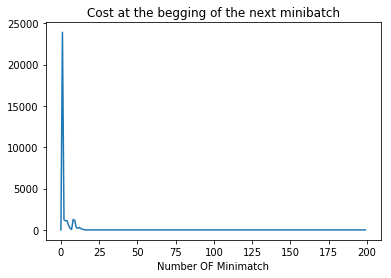

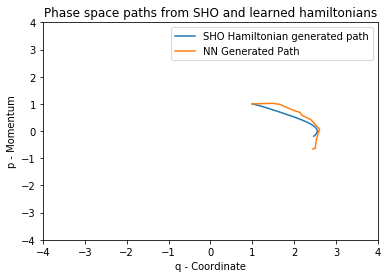

CurrentCost is: 140.51663262272814

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 140.51663262272814

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 116.99335628793997

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 116.99335628793997

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 112.83575488920542

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 100.57945435982157

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 92.03785948752467

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 91.20301016956948

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 89.6493343681768

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 86.9736257965832

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 86.97362

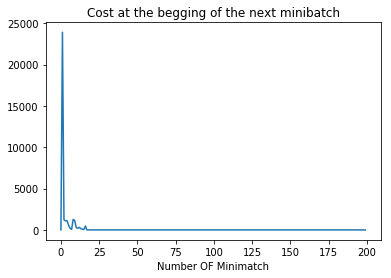

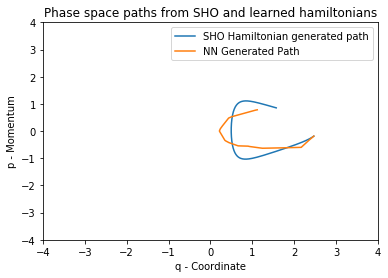

CurrentCost is: 241.53710281961767

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 241.53710281961767

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 167.44742705371704

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 85.30704917649675

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 30.035221429413113

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 28.2021879611201

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 13.504575372259634

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 9.40859692560222

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 9.40859692560222

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 8.280275917101728

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 6.93950876

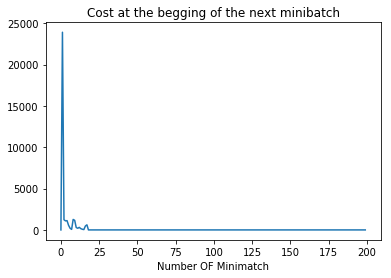

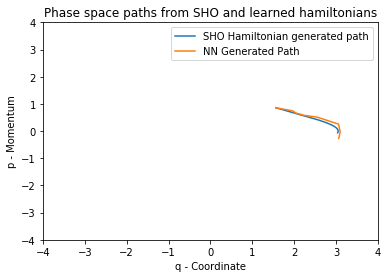

CurrentCost is: 22.831380109108323

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 12.324950824873513

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 6.238115937250122

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 6.238115937250122

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 4.040569235600858

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 4.040569235600858

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 4.040569235600858

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 3.111744823211863

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 2.8912011634108383

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 2.8912011634108383

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 2.891201

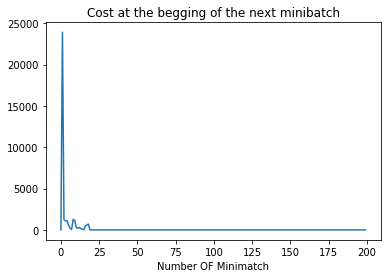

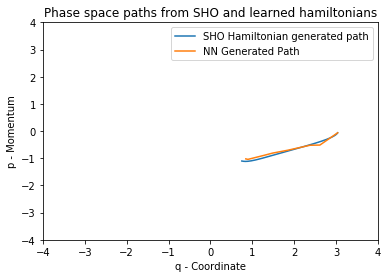

1
CurrentCost is: 23.270934340270564

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 23.270934340270564

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 6.975207644889104

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 6.975207644889104

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 6.975207644889104

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 6.678782357984238

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 5.2005161621573235

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 3.5076356952041325

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 3.1934105029321844

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 3.1934105029321844

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 3.19

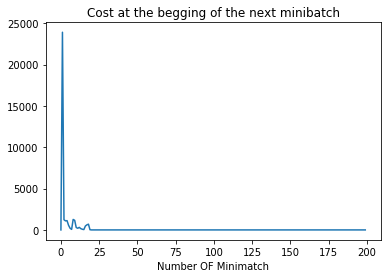

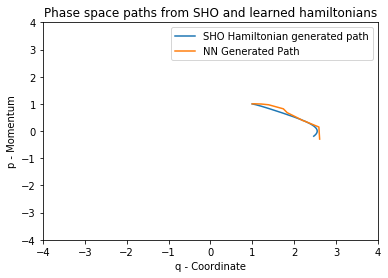

CurrentCost is: 606.9484740261357

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 347.31828550325895

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 224.93926245695283

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 197.03255945727963

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 117.19813379492594

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 115.82724056486555

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 108.61137949626358

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 105.1216277608834

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 103.26984667181844

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 103.26984667181844

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 102.

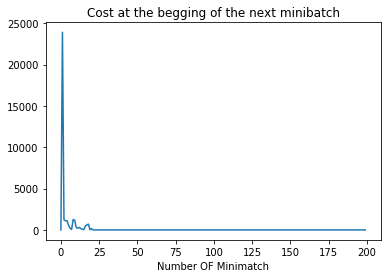

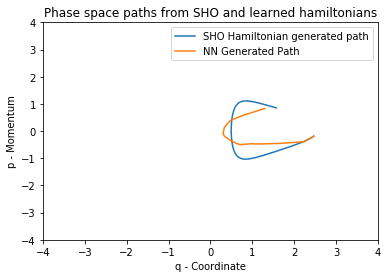

CurrentCost is: 101.88846477703044

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 15.973847924576694

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 15.973847924576694

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 2.8240208988426936

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 2.8240208988426936

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 2.8240208988426936

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 2.8240208988426936

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 2.503248320500074

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 2.2953791563302035

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 2.2953791563302035

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 2.2

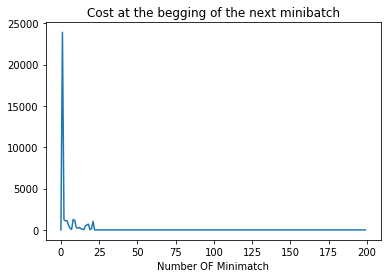

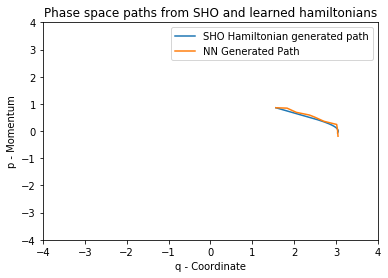

CurrentCost is: 55.78882982352363

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 55.78882982352363

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 25.60223828105406

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 10.41950078215649

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 10.41950078215649

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 7.897511145934944

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 7.335493459969234

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 6.77139913102323

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 6.433937504226839

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 5.488984477745231

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 5.48898447774

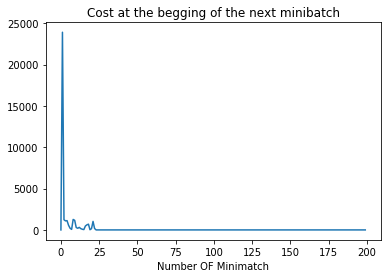

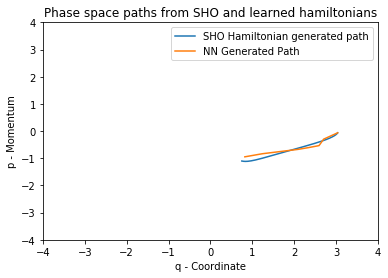

1
CurrentCost is: 32.02457673813468

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 32.02457673813468

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 32.02457673813468

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 32.02457673813468

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 32.02457673813468

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 15.454241799105517

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 10.21745410875077

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 9.162524514009899

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 8.747754722113397

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 8.747754722113397

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 8.7477547

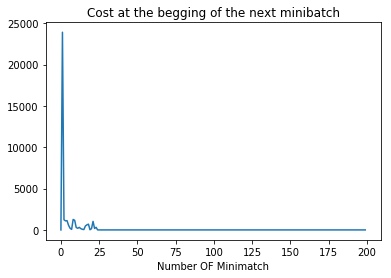

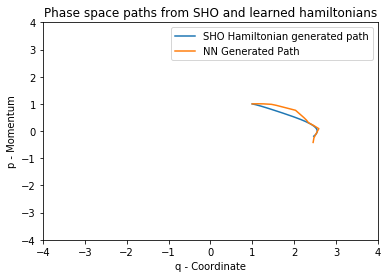

CurrentCost is: 766.1075605146713

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 240.2156383896995

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 139.90215772987105

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 139.90215772987105

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 125.67910164180142

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 125.67910164180142

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 125.67910164180142

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 94.80359306281196

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 89.18147875758179

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 86.96269003373308

Now Running Itteration 9 \ 15
the ImprovementItteration is: 8
CurrentCost is: 81.092076

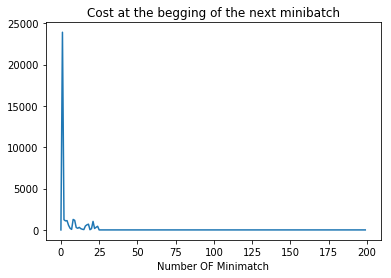

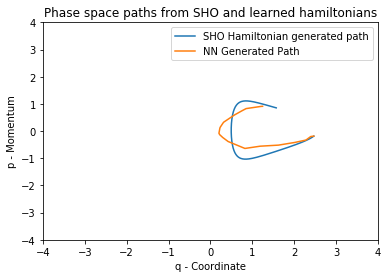

CurrentCost is: 139.44782558858506

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 60.03704759115976

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 29.12074798837942

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 13.159856801995465

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 10.961658739043994

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 9.692598391329836

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 7.643616456477133

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 7.643616456477133

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 7.63567626373153

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 7.457499174828203

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 7.45749917

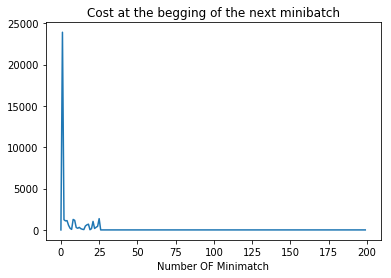

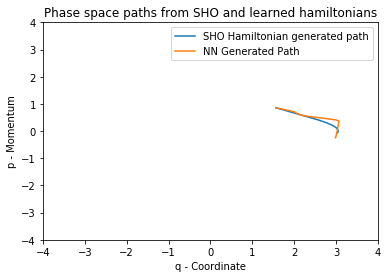

CurrentCost is: 80.83603036434782

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 80.83603036434782

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 33.324083788758045

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 23.837871214459387

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 9.217794112188397

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 9.217794112188397

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 7.942195431444966

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 7.942195431444966

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 7.7682971507638126

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 7.7682971507638126

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 7.768297

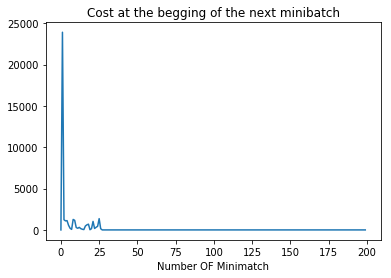

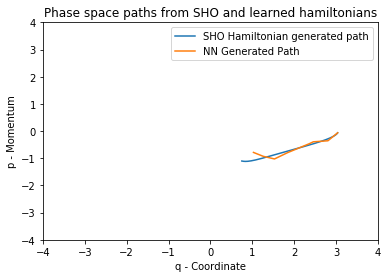

1
CurrentCost is: 425.7413765444081

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 194.57592707592917

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 194.57592707592917

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 120.9174427536903

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 90.59711736803537

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 43.39282448254664

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 25.052048492007263

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 19.739747009141734

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 19.27456565316581

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 13.83313824236711

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 13.244

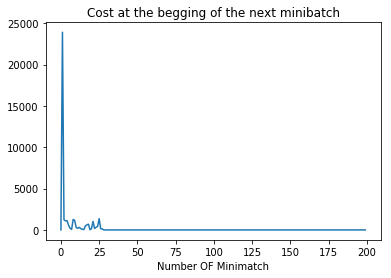

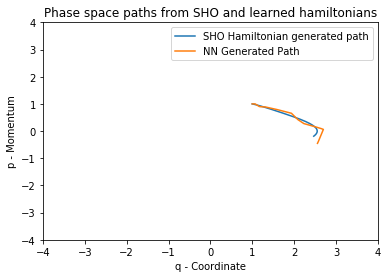

CurrentCost is: 484.8790657807955

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 362.54012064703164

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 106.68881992418564

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
Applied supression of change vector
CurrentCost is: 106.68881992418564

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 106.16544299149685

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 106.16544299149685

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 95.63253276105152

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 92.44868599220017

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 92.44868599220017

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 90.96584895399923

Now Running Itteration 9 \ 15
the ImprovementIttera

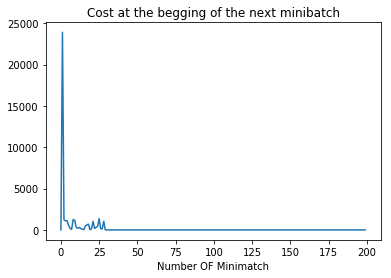

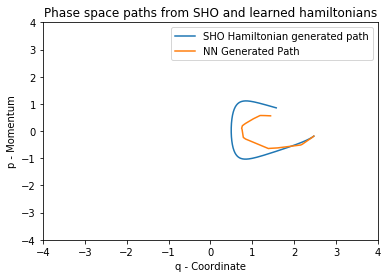

CurrentCost is: 19.46507786225845

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 19.46507786225845

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 19.46507786225845

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 6.0867483994320395

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 6.0867483994320395

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 6.0867483994320395

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 5.844116815940696

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 4.5567490499791

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 4.09206054445973

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 2.5142649523948473

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 2.514264952

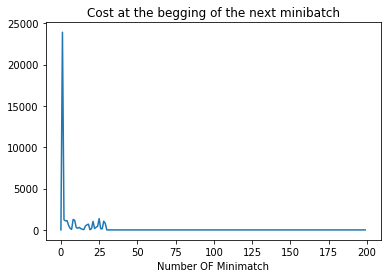

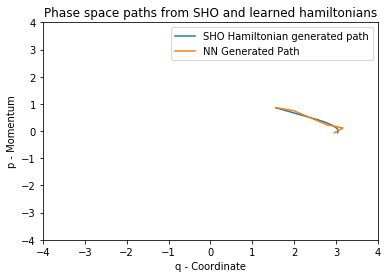

CurrentCost is: 20.298946308020582

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 11.434394924119962

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 11.434394924119962

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 11.434394924119962

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 11.434394924119962

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 9.13872151488251

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 9.13872151488251

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 9.13872151488251

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 8.671561346181242

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 8.671561346181242

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 8.67156134

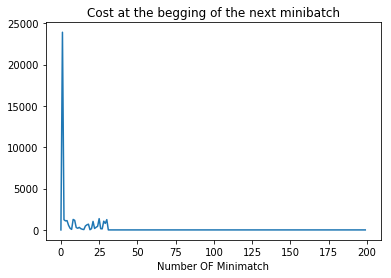

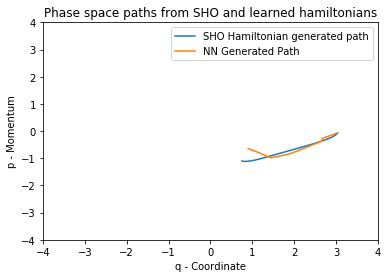

1
CurrentCost is: 43.889910406696615

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 27.742289046496214

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 13.776396237615595

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 13.776396237615595

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 13.776396237615595

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 13.776396237615595

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 11.205553784734471

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 11.205553784734471

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 10.396276090980647

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 10.015152925372094

Now Running Itteration 9 \ 15
the ImprovementItteration is: 8
CurrentCost is: 10

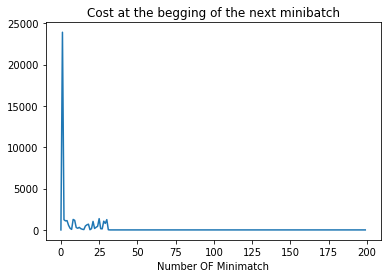

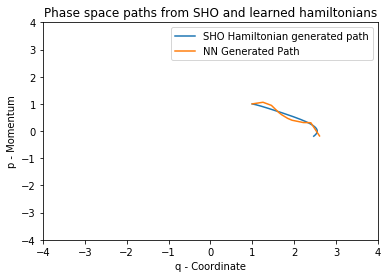

CurrentCost is: 688.0638698190295

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 367.1954400189327

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 367.1954400189327

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 302.65114109688045

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 182.43947479959274

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 166.63350173994874

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 145.2332318037093

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 136.23810165560104

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 133.85476079698435

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 127.12181341658054

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 121.85

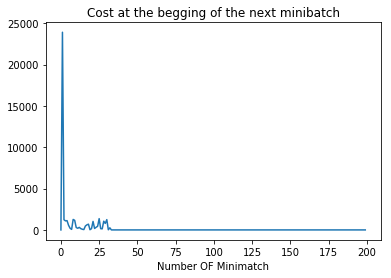

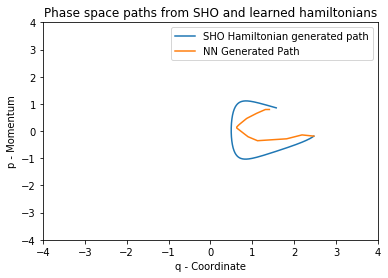

CurrentCost is: 158.3112325666748

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 7.369336101627518

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 5.618571705283813

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 5.618571705283813

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 5.618571705283813

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 5.618571705283813

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 5.618571705283813

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 4.489455256280272

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 4.489455256280272

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 4.489455256280272

Now Running Itteration 9 \ 15
the ImprovementItteration 

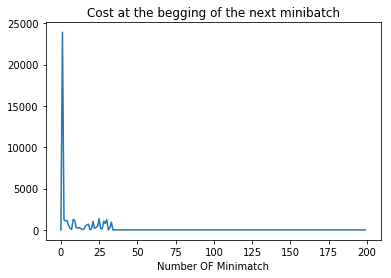

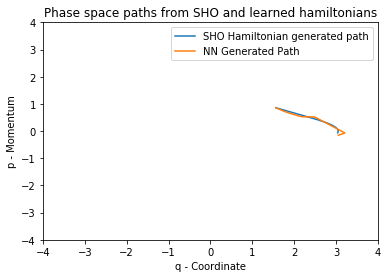

CurrentCost is: 95.25398027113317

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 62.700220690655044

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 62.700220690655044

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 45.01011476703486

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 45.01011476703486

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 40.627224506576

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 40.627224506576

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 40.627224506576

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 31.681386619872445

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 31.681386619872445

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 31.5543972241466

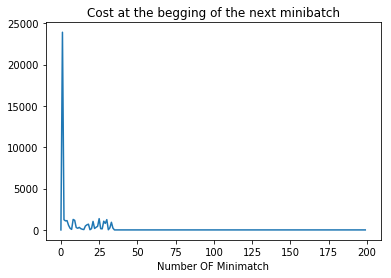

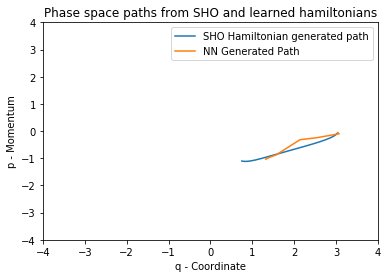

1
CurrentCost is: 218.32906415194844

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 61.67800995947281

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 34.88505076812872

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 34.88505076812872

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 34.88505076812872

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 34.88505076812872

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 34.88505076812872

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 31.218227528343412

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 28.976431724410073

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 28.196327765081552

Now Running Itteration 9 \ 15
the ImprovementItter

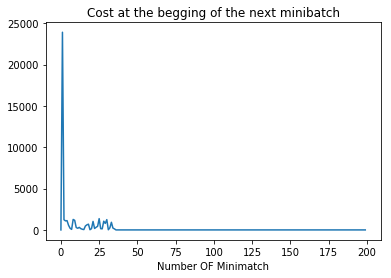

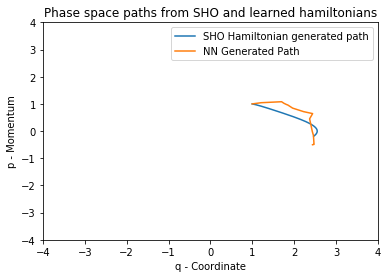

CurrentCost is: 390.58945466629734

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 121.28103529393474

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 115.65835929846958

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 115.65835929846958

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 115.65835929846958

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 115.65835929846958

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 109.5435168005342

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 103.78143274805284

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 103.78143274805284

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 101.98050763630714

Now Running Itteration 9 \ 15
the ImprovementIt

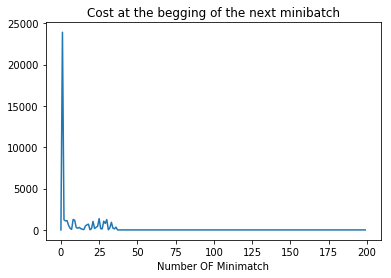

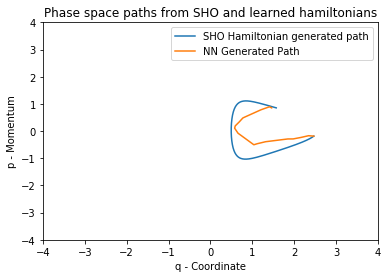

CurrentCost is: 40.513822229573606

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 40.513822229573606

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 15.26684154216324

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 15.26684154216324

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 15.26684154216324

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 15.26684154216324

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 9.641650997184637

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 9.641650997184637

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 8.344318977737846

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 8.344318977737846

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 8.34431897

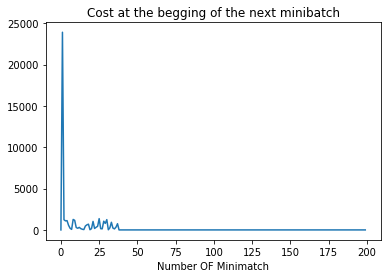

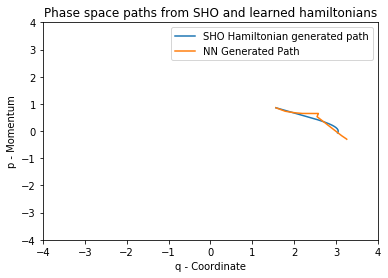

CurrentCost is: 86.06552429666428

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 86.06552429666428

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 86.06552429666428

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 48.941789231217285

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 30.956909001700915

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 25.624981092860196

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 25.624981092860196

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 25.477123038308523

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 23.10812650029307

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 22.90515738003636

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 17.4601

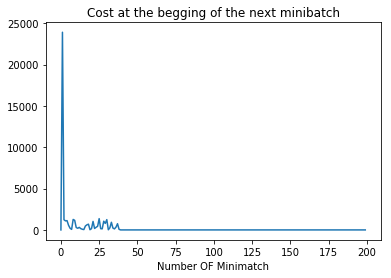

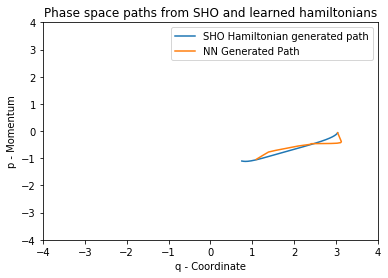

1
CurrentCost is: 61.2832554713824

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 61.2832554713824

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 61.2832554713824

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 61.2832554713824

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 57.66751020736573

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 31.270106246068792

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 28.135960287893706

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 25.81372562594445

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 23.830305004269107

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 23.830305004269107

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 23.8303050

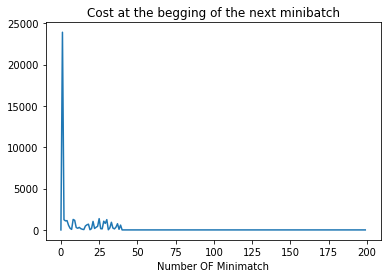

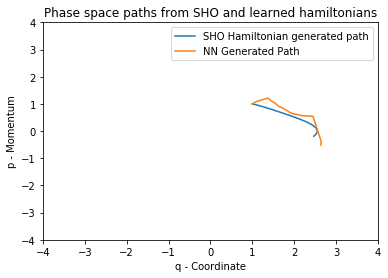

CurrentCost is: 99.91730821491925

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 99.91730821491925

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 85.93944502623684

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 85.93944502623684

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 83.95884369716151

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 80.10064750068082

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 80.10064750068082

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 75.30171756272556

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 74.49733391680181

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 70.53579923340155

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 70.365380178

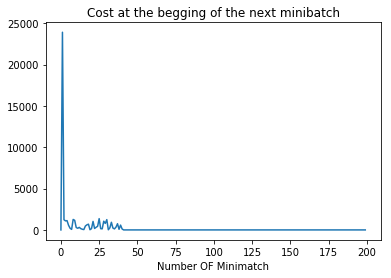

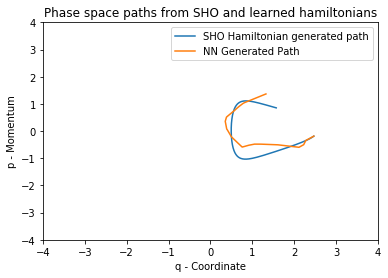

CurrentCost is: 112.37708913302178

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 112.37708913302178

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 53.69902650079066

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 22.15493796323852

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 22.15493796323852

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 17.486606121889523

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 11.450326231251212

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 10.306272076268646

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 9.720679754921498

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 9.720679754921498

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 6.33118

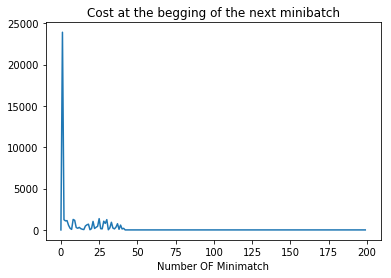

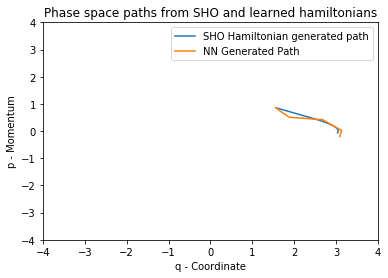

CurrentCost is: 54.704129080906455

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 33.19590498128733

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 31.40396341037015

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 30.732674833769135

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 30.732674833769135

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 25.24738427429242

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 20.554223913688762

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 19.439670589158396

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 18.008726809955018

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 17.576781198772863

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 14.44

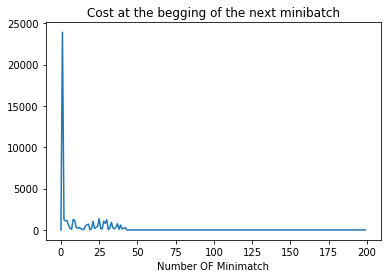

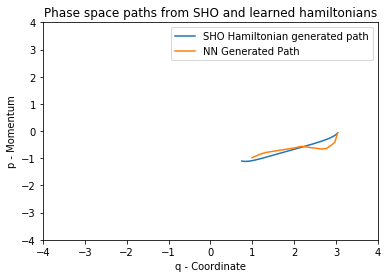

1
CurrentCost is: 127.43898957180434

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 99.57100310902537

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 82.66176158787948

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 51.527165903696755

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 51.527165903696755

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 39.708122403470306

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 38.485286823828226

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 38.485286823828226

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 38.485286823828226

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 34.8672876385571

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 33.561

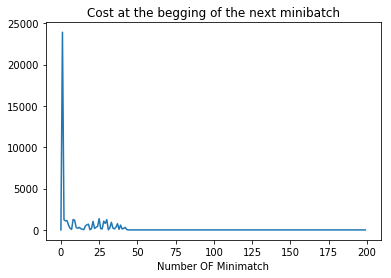

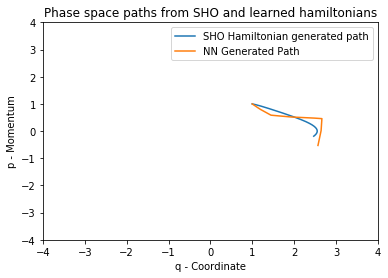

CurrentCost is: 293.22004641544476

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 293.22004641544476

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 71.34396655250924

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 71.34396655250924

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 66.18623165383623

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 63.29775741679373

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 59.503091983009895

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 59.503091983009895

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 59.503091983009895

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 58.73995038235058

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 58.7399

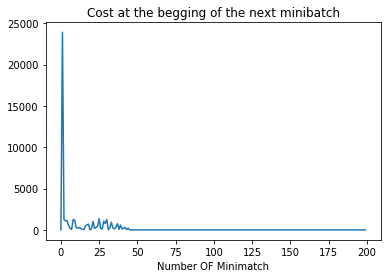

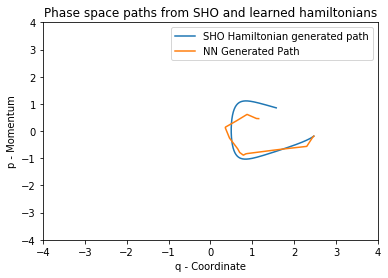

CurrentCost is: 99.20895741138807

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 39.10834759329254

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 27.731307194763396

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 27.731307194763396

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 27.731307194763396

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 27.731307194763396

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 25.820726676674376

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 25.820726676674376

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 25.46836780092009

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 25.46836780092009

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 25.468

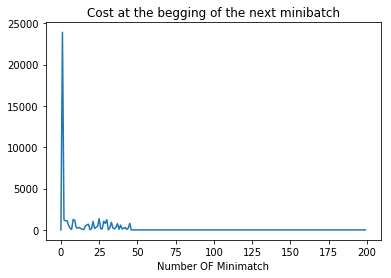

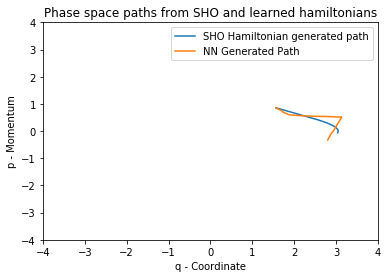

CurrentCost is: 18.060207803399376

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 18.060207803399376

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 18.060207803399376

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 18.060207803399376

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 18.060207803399376

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 18.060207803399376

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 17.32777333116315

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 17.32004623122187

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 16.87243184087189

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 16.87243184087189

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 16.872

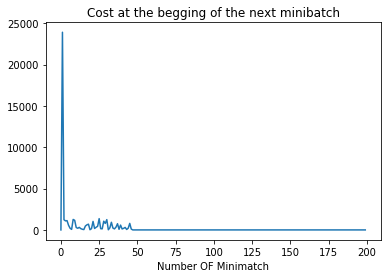

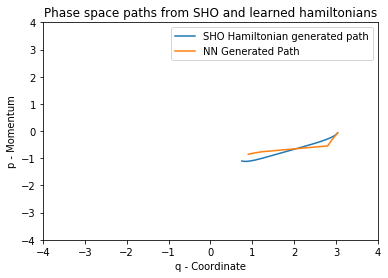

1
CurrentCost is: 206.50161270756655

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 158.9016328116487

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 158.9016328116487

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 97.39204279557869

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 67.82404181387062

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 65.91615473634256

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 53.482330650265965

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 46.58686669819165

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 46.58686669819165

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 46.16831336765291

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 44.5351409

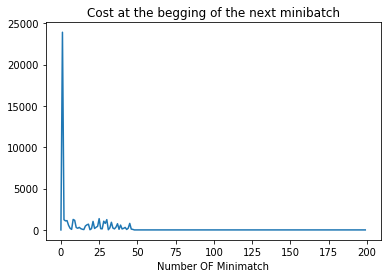

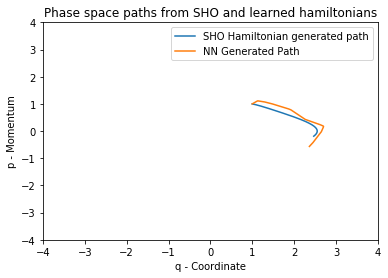

CurrentCost is: 262.71907455523905

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 262.71907455523905

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 237.9132125547399

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 199.6355569346303

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 135.55063401420637

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 128.7465444544412

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 121.70445965155011

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 121.70445965155011

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 119.23143950068444

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 110.54852341956712

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 110.5

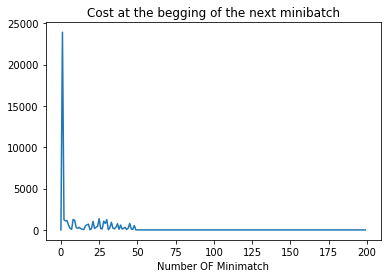

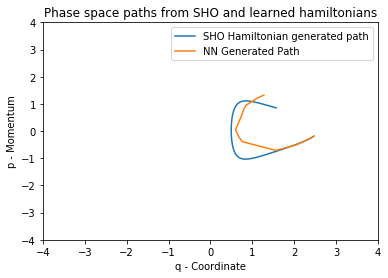

CurrentCost is: 340.7256513245992

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 340.7256513245992

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 208.25178947702952

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 139.0911966762461

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 84.95272148743038

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 84.95272148743038

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 65.8718958606328

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 53.79649840069327

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 52.28212666926287

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 48.6292823704957

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 48.6292823704

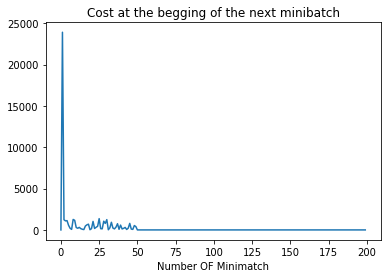

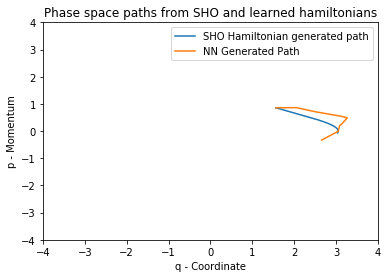

CurrentCost is: 151.11535831453284

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 151.11535831453284

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 101.70267799304781

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 101.70267799304781

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 96.28233523710769

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 52.458344605666895

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 43.68631279651404

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 38.975462497992254

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 37.94477498475091

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 31.30446935488513

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 31.304

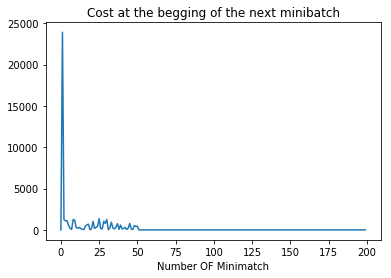

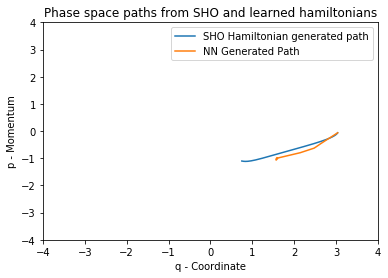

1
CurrentCost is: 445.4678260950271

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 414.3683787225927

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 226.04822422532038

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 148.44965819642616

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 148.44965819642616

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 148.44965819642616

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 148.44965819642616

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 134.01559153528183

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 132.75520567029685

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 132.75520567029685

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 13

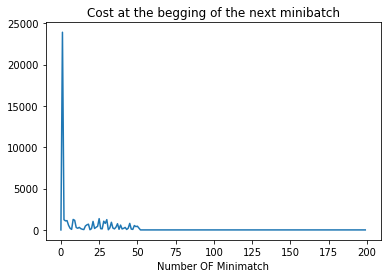

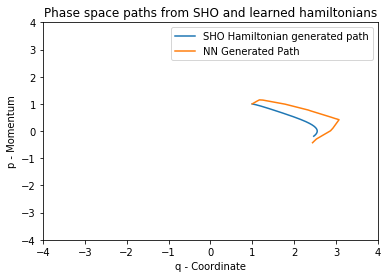

CurrentCost is: 421.0386842252901

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 369.82498654795995

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 249.52478358004066

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 132.80161644754935

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 132.80161644754935

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 104.89321270362444

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 86.48558577096034

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 79.51767565454453

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 75.57512369436341

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 75.57512369436341

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 75.5751

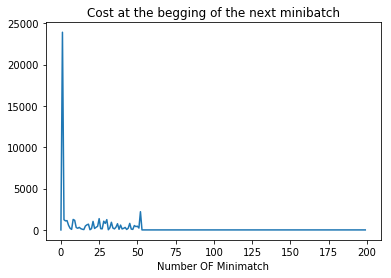

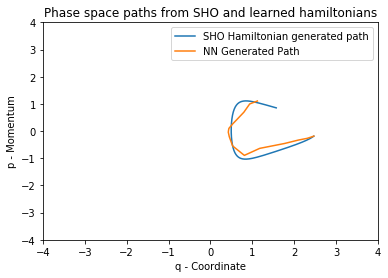

CurrentCost is: 120.7106488977997

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 56.96237682209165

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 41.75744124536801

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 41.75744124536801

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 34.70202353498993

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 34.70202353498993

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 27.030945000681672

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 26.966106456772582

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 24.92576895740137

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 23.785942880303242

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 23.78594288

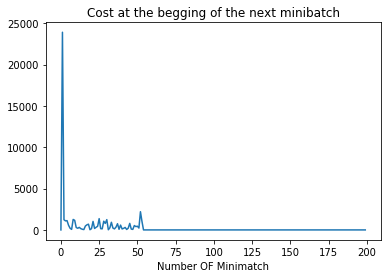

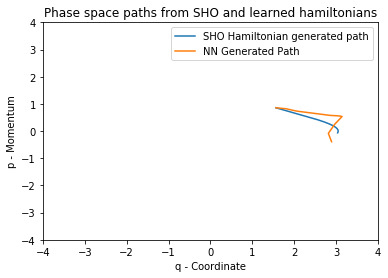

CurrentCost is: 502.04816752149895

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 374.72453222985064

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 216.01581483661653

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 110.74458252821235

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 81.95684214628174

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 71.16355785423059

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 61.89665173540633

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 57.82886640936955

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 57.377861273573515

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 57.377861273573515

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 57.377

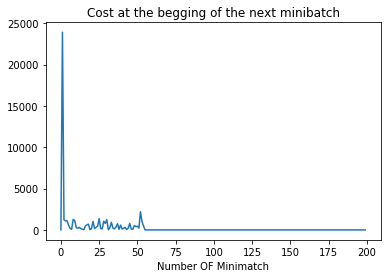

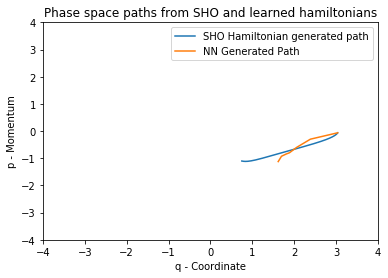

1
CurrentCost is: 361.59720975435795

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 361.59720975435795

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 84.9858482315731

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 66.5249784260643

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 66.5249784260643

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 63.523502486304075

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 61.02593064715167

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 58.46267749870493

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 57.80273864343168

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 57.80273864343168

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 57.8027386

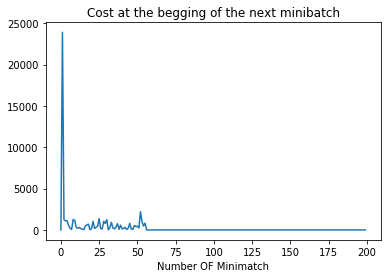

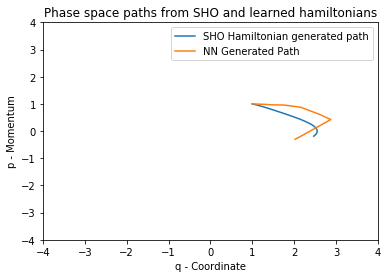

CurrentCost is: 352.14575384269097

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 352.14575384269097

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 191.31750432466183

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 113.69304315284566

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 113.69304315284566

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 113.69304315284566

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 110.86714592625593

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 96.35802442521522

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 94.96949132231549

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 94.39405874613935

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 94.39

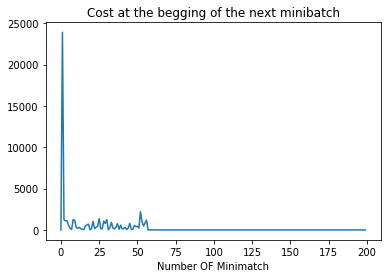

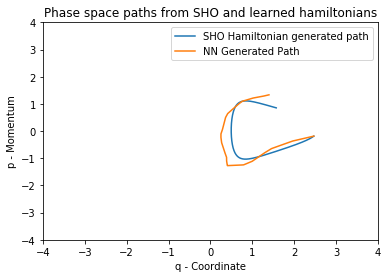

CurrentCost is: 101.82238187563075

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 101.82238187563075

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 93.74306895722334

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 42.18883852230076

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 42.18883852230076

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 33.438433293968934

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 23.993039858707796

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 23.993039858707796

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 23.505575422520607

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 23.35641242798497

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 23.356

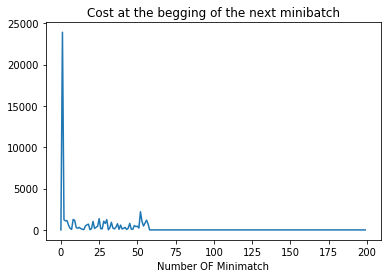

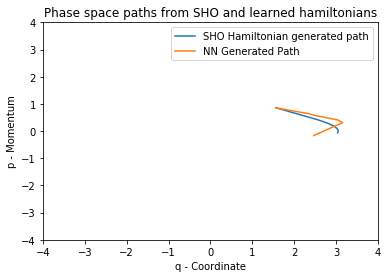

CurrentCost is: 128.980137766738

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 118.81528155952954

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 79.27583139968563

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 79.014159516975

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 70.79424686866926

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 64.18986882651484

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 64.18986882651484

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 62.29263417867853

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 61.78215262348173

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 60.499244965120944

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 60.4992449651

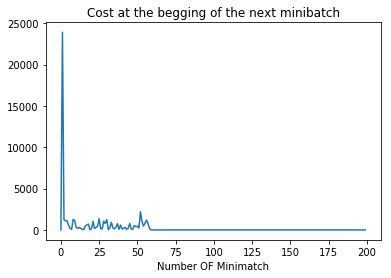

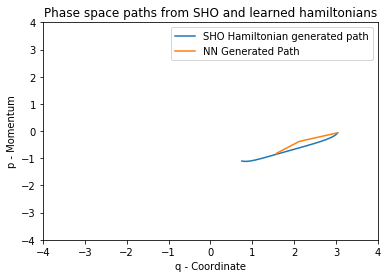

1
CurrentCost is: 361.16676828375597

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 268.0666246608383

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 163.000857565758

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 163.000857565758

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 163.000857565758

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 163.000857565758

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 132.31516030938

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 131.99233120578293

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 130.0400005415839

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 110.01833110374679

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 109.682914166

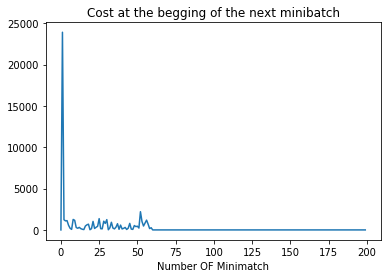

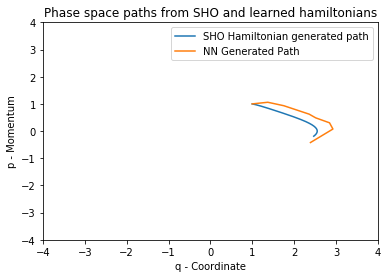

CurrentCost is: 478.7496938758549

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 234.64216023531944

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 146.18561700527283

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 87.29177887136542

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 50.3499734089264

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 50.3499734089264

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 50.3499734089264

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 50.3499734089264

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 50.3499734089264

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 46.2638477833384

Now Running Itteration 9 \ 15
the ImprovementItteration is: 8
CurrentCost is: 45.40947395354419


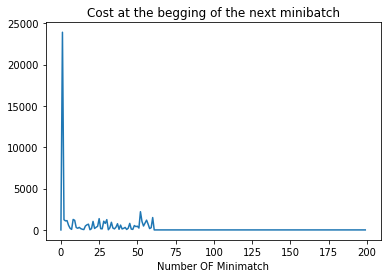

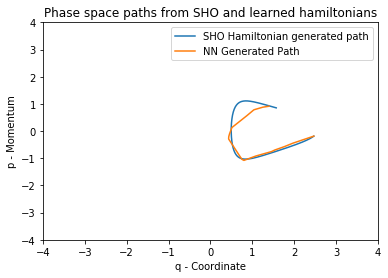

CurrentCost is: 42.809115071388746

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 42.809115071388746

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 40.45849791998551

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 37.152801948647635

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 36.88410882226003

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 31.754100777659538

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 31.754100777659538

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 30.529299465007632

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 29.019337674008927

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 27.9045384594212

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 27.239

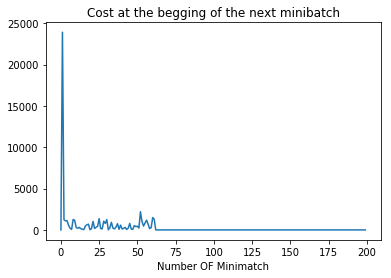

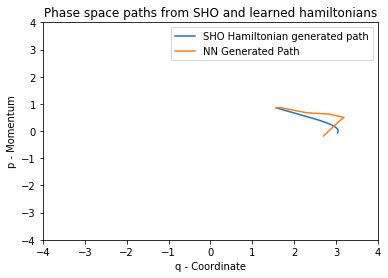

CurrentCost is: 59.245732658929924

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 34.98468045622149

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 34.98468045622149

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 22.45601986772518

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 19.469764581570406

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 19.469764581570406

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 19.2995955165395

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 17.80104072023525

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 17.80104072023525

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 17.80104072023525

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 17.8010407

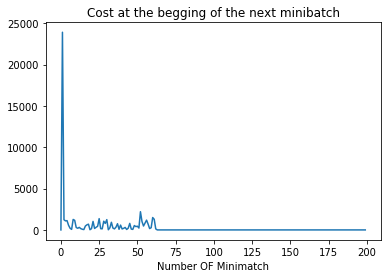

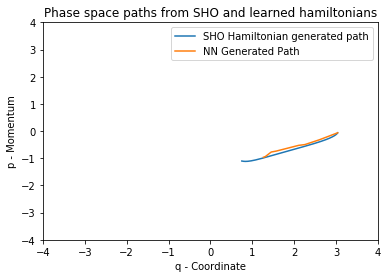

1
CurrentCost is: 763.110725773624

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 515.2793947676942

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 87.57375934458224

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
Applied supression of change vector
CurrentCost is: 87.57375934458224

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 87.57375934458224

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 86.42239846270584

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 83.19352865159505

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 77.11111142151134

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 66.94208774797562

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 58.9049272501226

Now Running Itteration 9 \ 15
the ImprovementItteration 

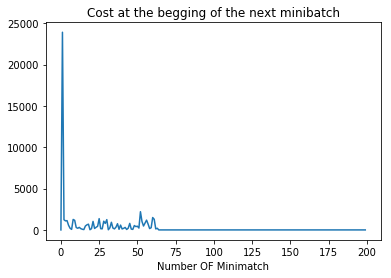

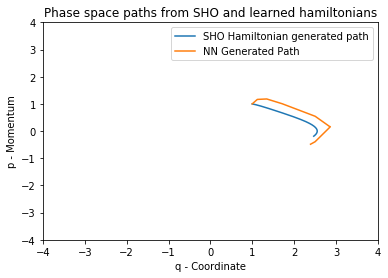

CurrentCost is: 64.40682349342418

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 64.40682349342418

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 44.984854747515286

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 30.587092839317698

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 30.587092839317698

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 30.587092839317698

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 30.587092839317698

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 28.191636006272727

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 28.191636006272727

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 28.191636006272727

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 28.1

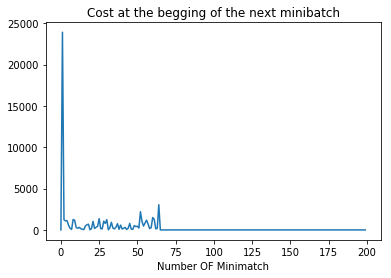

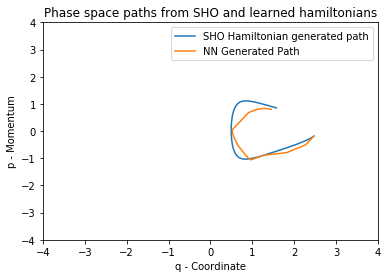

CurrentCost is: 25.580357254043918

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 25.580357254043918

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 25.580357254043918

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 17.724810846583992

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 17.724810846583992

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 17.724810846583992

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 14.157066374891603

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 11.010938819036989

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 10.952278156106534

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 10.952278156106534

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 10

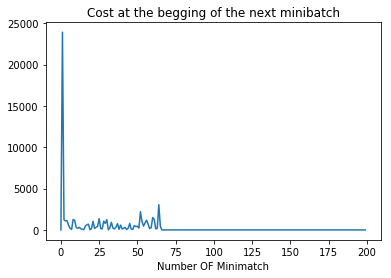

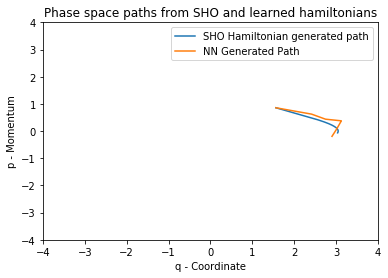

CurrentCost is: 31.45567436143212

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 31.45567436143212

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 26.264358403378537

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 26.264358403378537

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 26.264358403378537

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 26.264358403378537

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 23.092174775513612

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 22.310705077329185

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 21.821697363268417

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 21.821697363268417

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 21.8

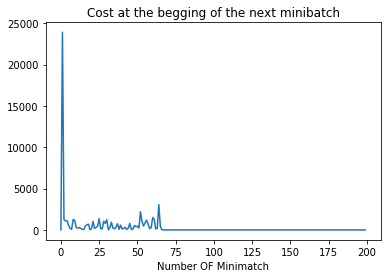

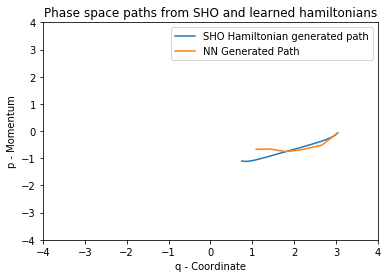

1
CurrentCost is: 34.1548310284969

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 34.1548310284969

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 34.1548310284969

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 34.1548310284969

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 34.1548310284969

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 34.1548310284969

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 34.1548310284969

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 30.862483331760465

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 30.57947329040316

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 27.01794482365636

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 27.0179448236563

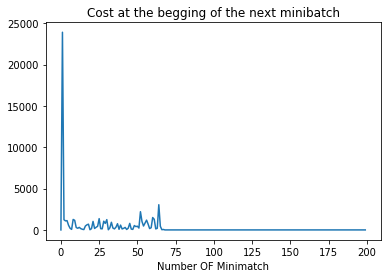

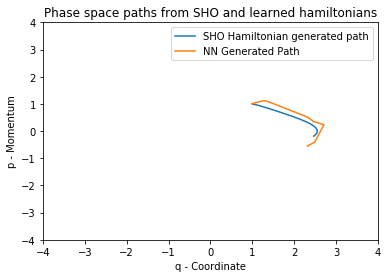

CurrentCost is: 49.23800993352384

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 49.23800993352384

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 49.23800993352384

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 21.50114243164762

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 21.50114243164762

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 19.967542590821935

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 19.967542590821935

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 19.967542590821935

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 19.693376854548525

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 19.693376854548525

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 19.6933

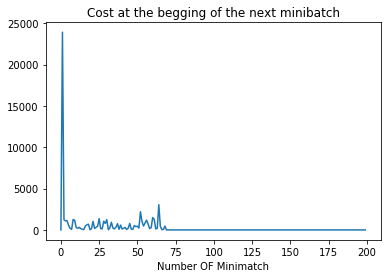

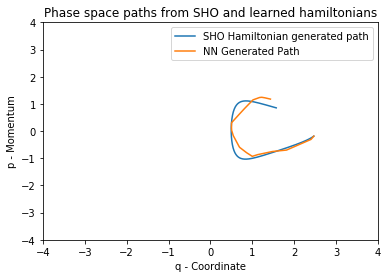

CurrentCost is: 28.90636152488313

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 28.90636152488313

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 23.075657904734612

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 19.38348988934733

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 19.014293587775967

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 13.863855692712391

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 12.59852651089011

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 12.59852651089011

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 11.978086450081047

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 11.978086450081047

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 11.9780

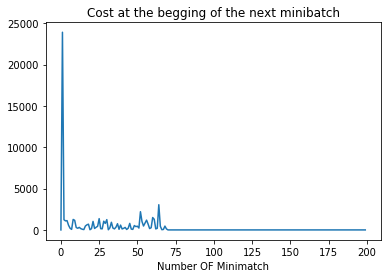

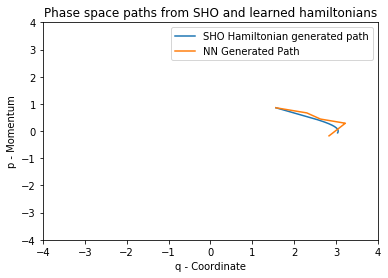

CurrentCost is: 22.50319277488836

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 22.50319277488836

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 18.933705121713377

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 18.933705121713377

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 15.355689669960068

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 15.355689669960068

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 15.355689669960068

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 12.389021342751082

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 11.665037296780744

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 11.665037296780744

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 11.6

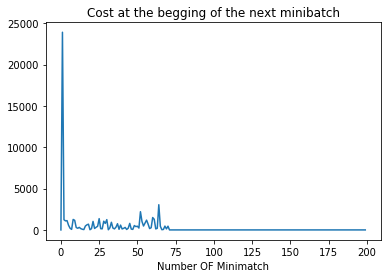

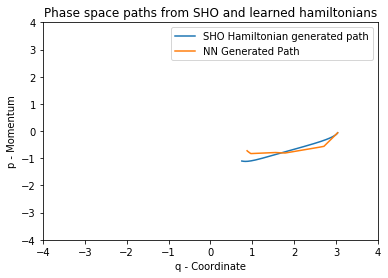

1
CurrentCost is: 104.29779736868687

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 45.89484024209032

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 45.89484024209032

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 34.86251771782575

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 34.86251771782575

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 34.86251771782575

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 34.86251771782575

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 31.871004371728507

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 30.29158587138277

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 30.29158587138277

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 28.11389

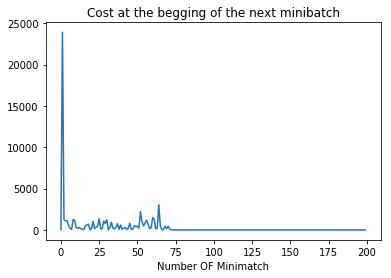

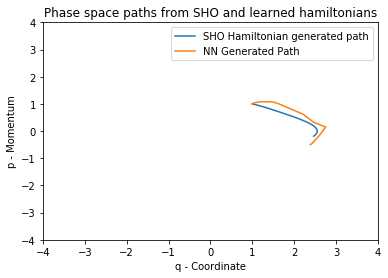

CurrentCost is: 24.783626194911935

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 24.783626194911935

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 24.783626194911935

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 24.783626194911935

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 23.758928807737007

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 23.758928807737007

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 21.573076874451953

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 21.573076874451953

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 21.444502146894354

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 21.444502146894354

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 21

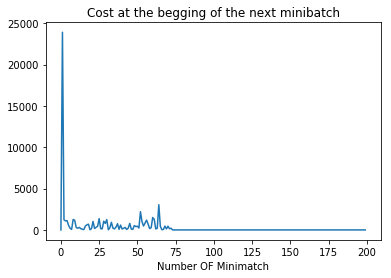

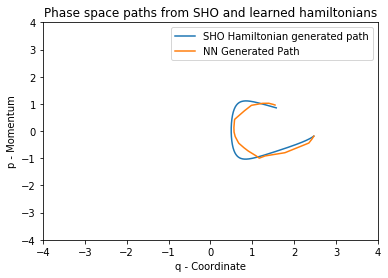

CurrentCost is: 66.55749386760071

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 66.55749386760071

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 54.69920876394249

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 54.69920876394249

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 18.11255960939645

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 12.52122019734922

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 12.447904440002619

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 10.710765699160739

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 10.658775430475838

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 10.658775430475838

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 10.65877

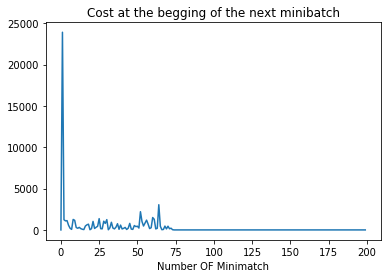

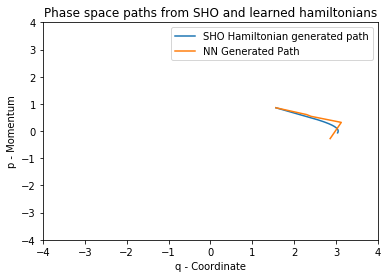

CurrentCost is: 30.489527669923078

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 30.489527669923078

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 30.489527669923078

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 27.9186013323596

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 17.174755234799008

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 12.02221808460829

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 12.02221808460829

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 11.914909530436145

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 11.456545581539562

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 11.456545581539562

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 11.456

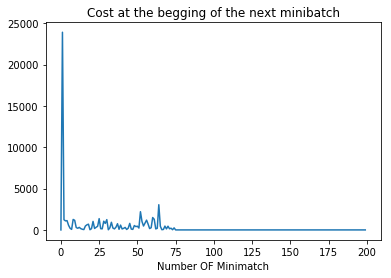

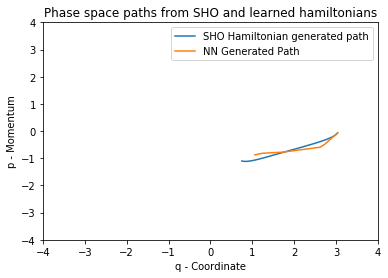

1
CurrentCost is: 232.5975517831052

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 47.100480587326

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 47.100480587326

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 29.83580407559475

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 29.81665480742898

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 29.81665480742898

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 28.926924888940906

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 28.926924888940906

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 28.86607144913193

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 28.86607144913193

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 27.921080292

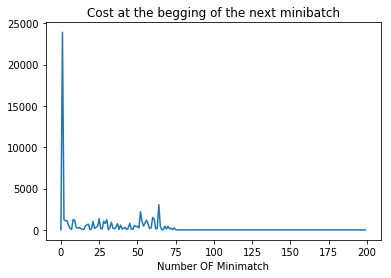

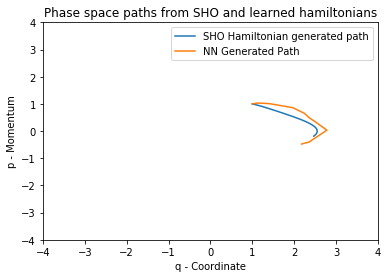

CurrentCost is: 469.91534938992703

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 271.4730323574724

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 163.10790716762125

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 120.4142796013338

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 119.62805984381491

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 86.18271009046057

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 81.9698879581908

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 80.87035190668787

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 80.7648732069065

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 80.7648732069065

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 80.764873206

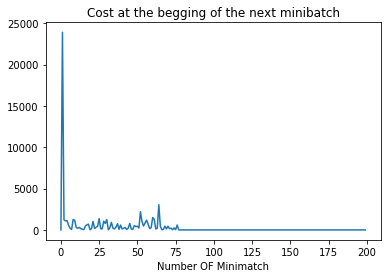

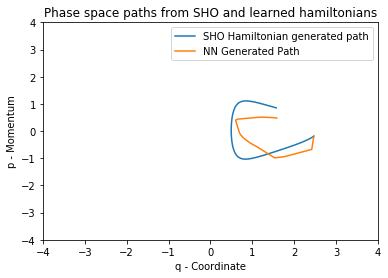

CurrentCost is: 162.74444342064635

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 133.81858477748983

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 32.56569589991223

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 20.768454285615164

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 12.608467852884944

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 12.608467852884944

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 12.608467852884944

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 10.459252843567603

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 10.169444884382576

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 10.169444884382576

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 10.

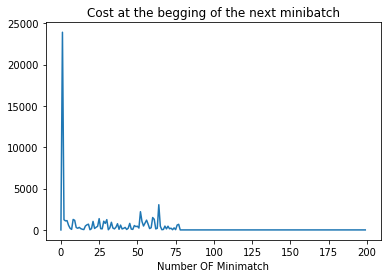

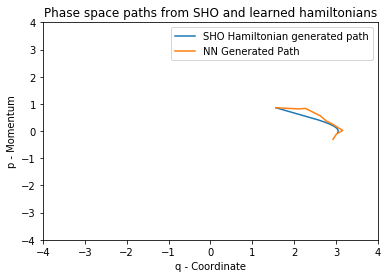

CurrentCost is: 53.94876434419253

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 53.94876434419253

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 42.754172526063016

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 32.954091330746174

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 32.954091330746174

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 32.954091330746174

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 32.954091330746174

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 32.25379248623499

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 31.790857793834558

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 31.185820160768998

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 31.18

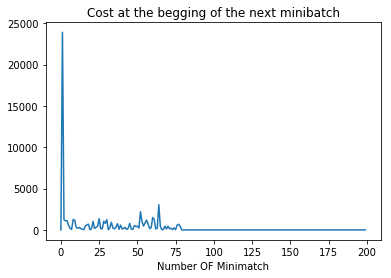

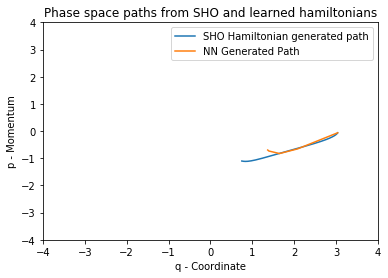

1
CurrentCost is: 712.4592160806692

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 712.4592160806692

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 166.08852606382555

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 125.1301697653488

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 102.05670637069838

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 88.57372878674707

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 80.09077182787381

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 80.09077182787381

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 79.62524598436863

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 79.62524598436863

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 79.40194

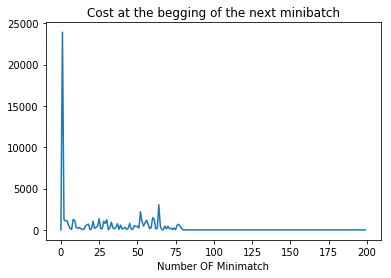

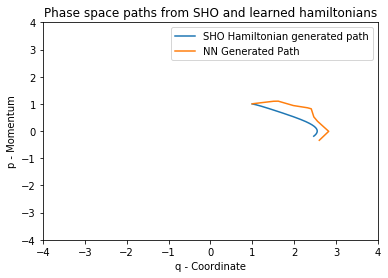

CurrentCost is: 150.1762599134721

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 150.1762599134721

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 113.70273342641065

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 81.07701847580199

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 81.07701847580199

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 81.07701847580199

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 78.71652318587479

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 74.45917955316283

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 74.1621779466088

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 72.13504421716983

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 72.135044217

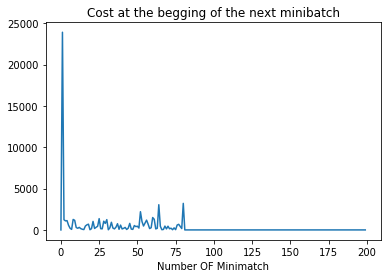

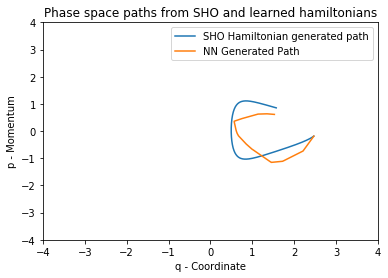

CurrentCost is: 49.36207735365979

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 46.98877718153389

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 46.98877718153389

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 46.98877718153389

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 44.98774447121369

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 44.98774447121369

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 44.98774447121369

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 41.843551049339105

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 41.843551049339105

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 41.843551049339105

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 40.22539611

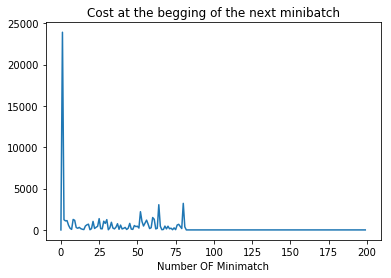

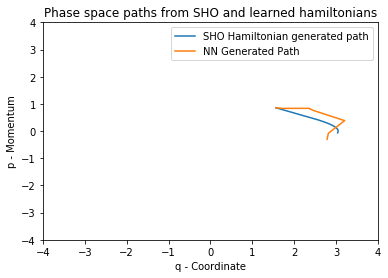

CurrentCost is: 138.55854470385964

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 138.55854470385964

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 68.71717496193435

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 30.460288904257748

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 28.920106879712208

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 28.920106879712208

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 28.920106879712208

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 28.029425460692906

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 27.74473466378268

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 27.74473466378268

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 27.74

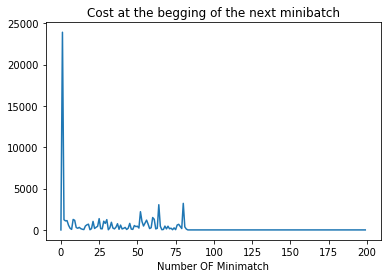

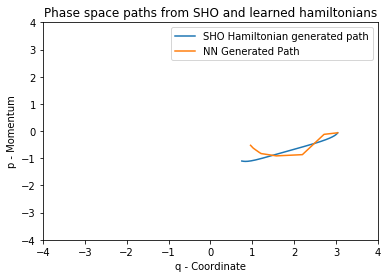

1
CurrentCost is: 1935.965007788264

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 476.22519836242174

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 261.96371434853364

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 261.96371434853364

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 261.96371434853364

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 248.8390580500799

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 164.34127318700183

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 157.22208902727448

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 146.80958710131955

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 146.80958710131955

Now Running Itteration 9 \ 15
the ImprovementI

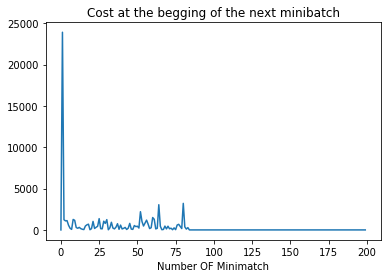

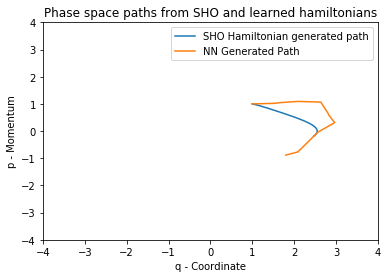

CurrentCost is: 630.1507172167156

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 630.1507172167156

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 466.0566484048797

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 267.0125195150676

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 105.26629563454806

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 72.68922167044822

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 69.80281008629979

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 65.92605879186718

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 65.7299145652733

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 63.569587658864634

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 60.48082017

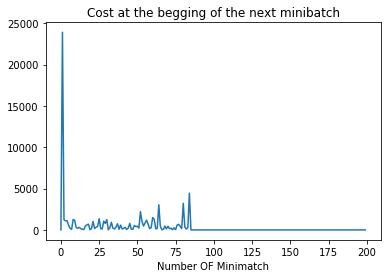

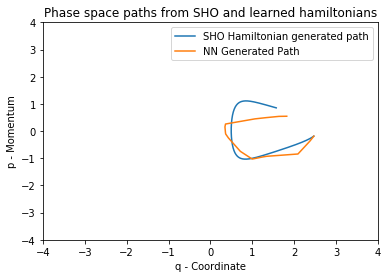

CurrentCost is: 274.3762997555974

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 180.7143421506974

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 114.96432199886436

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 67.4705123524494

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 67.4705123524494

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 64.21510930071393

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 64.21510930071393

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 62.90940498776643

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 62.667601022653244

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 62.36610132420879

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 62.366101324

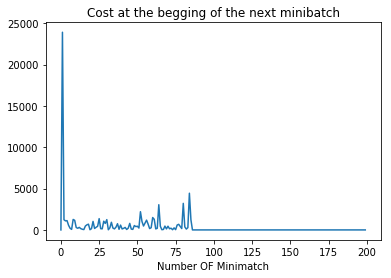

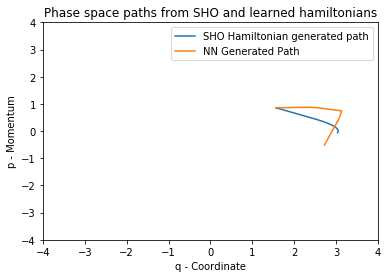

CurrentCost is: 136.8275563224062

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 136.8275563224062

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 106.36219969363434

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 65.89605615654543

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 65.89605615654543

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 26.07940182364978

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 24.63269626561402

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 18.20714389091878

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 17.42772482334869

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 17.42772482334869

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 17.42772482

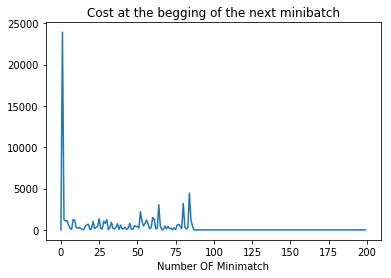

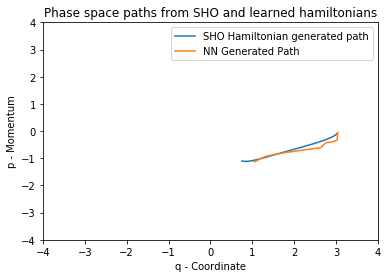

1
CurrentCost is: 309.9006255574744

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 309.9006255574744

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 170.93536719565756

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 96.4881504483761

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 94.1442873552677

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 94.1442873552677

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 72.6361073514824

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 72.6361073514824

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 70.85246371639109

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 68.71394567467797

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 67.98307271347

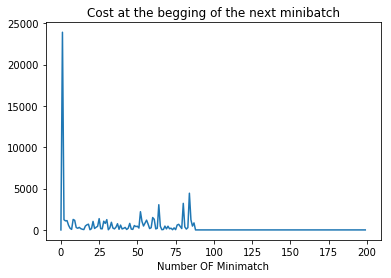

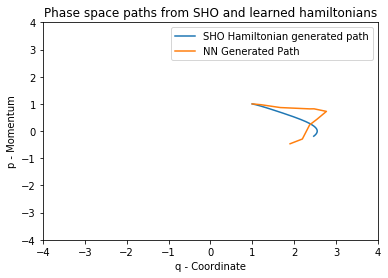

CurrentCost is: 396.61196435038994

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 90.95045224990481

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 42.92264392129395

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 42.92264392129395

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 42.92264392129395

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 42.92264392129395

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 41.777675806256916

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 41.777675806256916

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 41.777675806256916

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 31.580371488259168

Now Running Itteration 9 \ 15
the ImprovementIttera

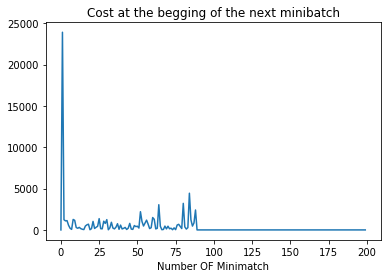

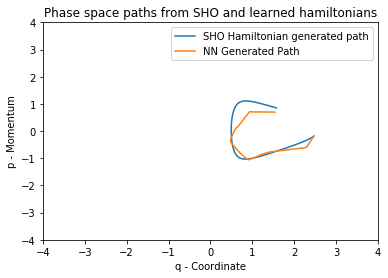

CurrentCost is: 152.72740214590777

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 123.5320196822169

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 123.5320196822169

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 87.55145159547548

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 87.55145159547548

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 87.55145159547548

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 79.93847499981015

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 73.9649884630051

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 73.34642863191468

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 73.34642863191468

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 73.346428631

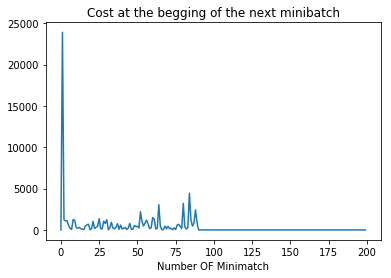

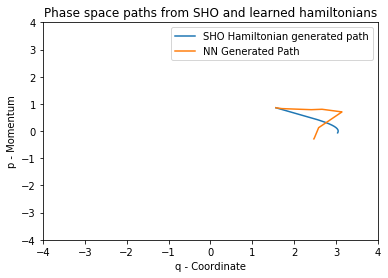

CurrentCost is: 145.68660724609853

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 145.68660724609853

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 34.53462218589983

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 26.82014102800978

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 24.431633470102298

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 18.64224588174369

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 18.64224588174369

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 18.215661088655676

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 17.447445255173566

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 17.447445255173566

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 17.447

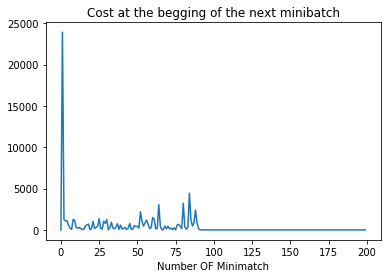

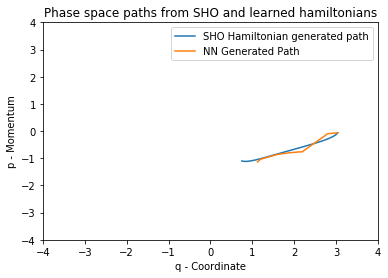

1
CurrentCost is: 79.63587876132489

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 79.63587876132489

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 79.63587876132489

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 76.54482641187998

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 76.54482641187998

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 70.3100029121727

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 70.3100029121727

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 68.36916992884763

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 63.0120671212005

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 61.447101029391945

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 54.103989779

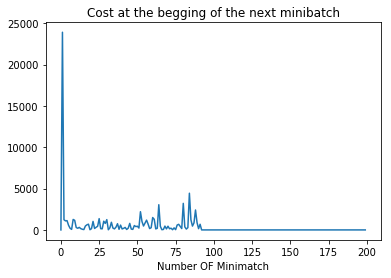

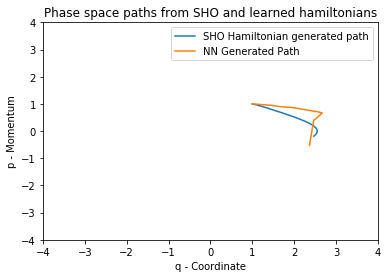

CurrentCost is: 462.1813593634091

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 189.22538577736145

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 56.09905670527111

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 56.09905670527111

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 56.09905670527111

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 36.40285736198808

Now Running Itteration 5 \ 15
the ImprovementItteration is: 4
CurrentCost is: 36.40285736198808

Now Running Itteration 6 \ 15
the ImprovementItteration is: 5
CurrentCost is: 30.38245871015102

Now Running Itteration 7 \ 15
the ImprovementItteration is: 6
CurrentCost is: 28.036604067444575

Now Running Itteration 8 \ 15
the ImprovementItteration is: 7
CurrentCost is: 28.036604067444575

Now Running Itteration 9 \ 15
the ImprovementItteration is: 8
CurrentCost is: 26.71720677

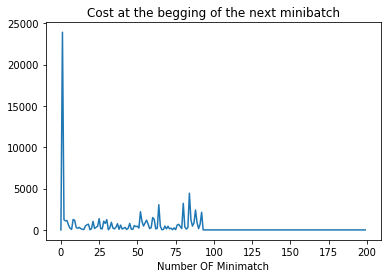

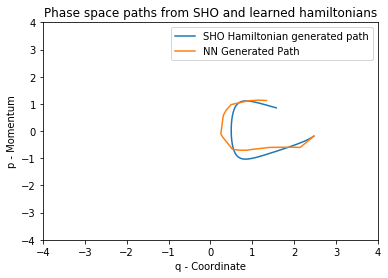

CurrentCost is: 177.95207587277102

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 50.33658426834136

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 50.33658426834136

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 27.280906659621678

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 27.280906659621678

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 27.280906659621678

Now Running Itteration 5 \ 15
the ImprovementItteration is: 5
CurrentCost is: 27.280906659621678

Now Running Itteration 6 \ 15
the ImprovementItteration is: 6
CurrentCost is: 27.280906659621678

Now Running Itteration 7 \ 15
the ImprovementItteration is: 7
CurrentCost is: 27.280906659621678

Now Running Itteration 8 \ 15
the ImprovementItteration is: 8
CurrentCost is: 26.164113058879636

Now Running Itteration 9 \ 15
the ImprovementItteration is: 9
CurrentCost is: 26.164

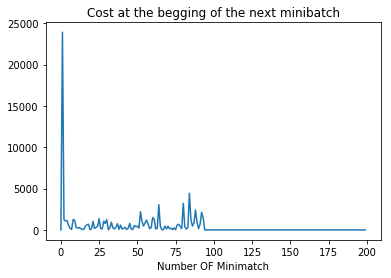

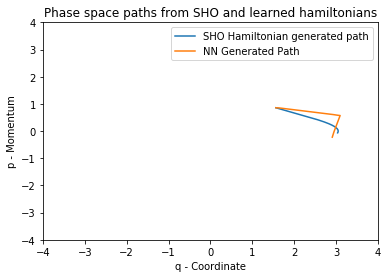

CurrentCost is: 88.20475315278215

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 88.20475315278215

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 27.33359076374063

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 27.33359076374063

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 21.257495738199136

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 21.257495738199136

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 10.448756842683819

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 9.136747186066266

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 9.136747186066266

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10
CurrentCost is: 6.194950122366586

Now Running Itteration 9 \ 15
the ImprovementItteration is: 11
CurrentCost is: 6.1949501

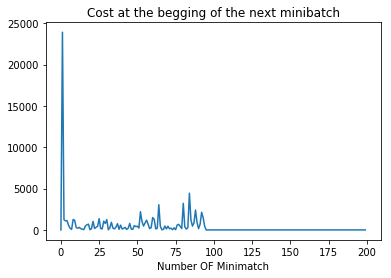

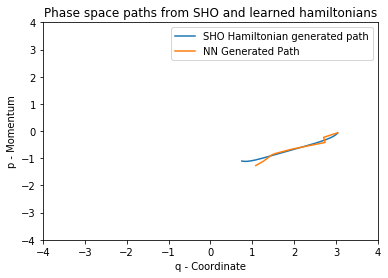

1
CurrentCost is: 64.20119610626018

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 64.20119610626018

Now Running Itteration 1 \ 15
the ImprovementItteration is: 3
CurrentCost is: 64.20119610626018

Now Running Itteration 2 \ 15
the ImprovementItteration is: 4
CurrentCost is: 64.20119610626018

Now Running Itteration 3 \ 15
the ImprovementItteration is: 5
CurrentCost is: 64.20119610626018

Now Running Itteration 4 \ 15
the ImprovementItteration is: 6
CurrentCost is: 64.20119610626018

Now Running Itteration 5 \ 15
the ImprovementItteration is: 7
CurrentCost is: 58.28025104988436

Now Running Itteration 6 \ 15
the ImprovementItteration is: 8
CurrentCost is: 58.28025104988436

Now Running Itteration 7 \ 15
the ImprovementItteration is: 9
CurrentCost is: 56.940558259277005

Now Running Itteration 8 \ 15
the ImprovementItteration is: 10


KeyboardInterrupt: 

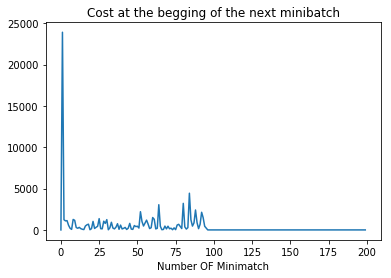

In [82]:
def Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted):
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((p_true - p_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((p_true - p_predicted)/(dp_true - dp_predicted)))
#     Scaling_Factor1 = 1
#     Scaling_Factor2 = 1

    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor2*np.sum((dp_true - dp_predicted)**2)

    Loss =  Loss2 + Loss1
    return Loss



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
#             q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
#             q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)
            q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
    
            
            Cost_Function1[i] = Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)


        return Cost_Function1
    

def Prediction_for_State_Transitions(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    

def Calculate_NN_State_Transitions(Parameter_Vector,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total):


    
    
#     Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[0:35])
#     Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[35:70])


    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)


    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])


    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):
#     for i in range(1,10):

        q_predicted[i] = q_true[i] + dq_predicted[i-1]
        p_predicted[i] = p_true[i] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Prediction_for_State_Transitions(Net1,Net2,np.array([q_true[i],p_true[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)
        
    return q_predicted, p_predicted, dq_predicted, dp_predicted



## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =10
Maximal_Random_Search = 0.001
NumberOfSamples = 10 ## This is the number of individuals in each itteration


Number_Of_Itterations =20
print_Cost = 1


x = 1
y = 1
# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
InitialParameters = np.random.rand(int(2*TotalParameters_in_5_layer_net),1)

T_total = 0.5
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)



# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
    

plt.figure(0)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.show()

Number_Of_Minibatches = 200
Cost_Tracking_Vector = np.zeros(Number_Of_Minibatches)
for i in range (1,Number_Of_Minibatches):

    
    Number_Of_Itterations =15
    T_total = 4.5
    
    
    N = q_true.shape[0]
    First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
    if np.mod(i,4) == 0:
        print(1)
        First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
    
    q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
    
    Cost_Tracking_Vector[i]    = Cost1.Cost_Function(Best_Individual)

    Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)
#     q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

    q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
    
    plt.figure(4)
    plt.plot(q_true,p_true)
    plt.plot(q_predicted,p_predicted)
    plt.title("Phase space paths from SHO and learned hamiltonians")
    plt.xlabel("q - Coordinate")
    plt.ylabel("p - Momentum")
    plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.show()

    
    plt.figure(5)
    plt.title("Cost at the begging of the next minibatch")
    plt.plot(Cost_Tracking_Vector)
    plt.xlabel("Cost")
    plt.xlabel("Number OF Minimatch")


In [83]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

(158,)
(158,)
(316, 1)
(316, 1)


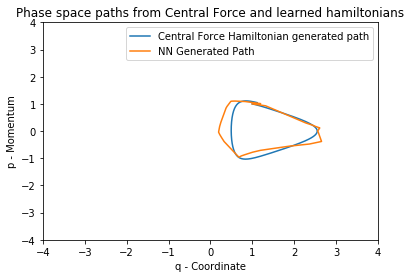

CurrentCost is: 364.49909369964394

Now Running Itteration 0 \ 10
the ImprovementItteration is: 2
CurrentCost is: 364.49909369964394

Now Running Itteration 1 \ 10
the ImprovementItteration is: 3
CurrentCost is: 364.49909369964394

Now Running Itteration 2 \ 10
the ImprovementItteration is: 4
CurrentCost is: 184.1709835615614

Now Running Itteration 3 \ 10
the ImprovementItteration is: 5
CurrentCost is: 184.1709835615614

Now Running Itteration 4 \ 10
the ImprovementItteration is: 2
CurrentCost is: 184.1709835615614

Now Running Itteration 5 \ 10
the ImprovementItteration is: 3


KeyboardInterrupt: 

In [117]:
Best_Individual1 = Open_Parameters_Of_Network()
Best_Individual = Best_Individual1
T_total = 8.5
    
## Testing network on longer data
N = q_true.shape[0]
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from Central Force and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["Central Force Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =2
Maximal_Random_Search = 0.0001
NumberOfSamples = 10 ## This is the number of individuals in each itteration



Number_Of_Itterations =10
  
N = q_true.shape[0]
# First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




# Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [ ]:
Hamiltonian_Relative_Error = np.sqrt((1/N)*np.sum((((p_true-p_predicted))**2 + ((q_true-q_predicted)**2 ))/(q_true**2 + p_true**2)))
print("The Hamiltonian Relative Error",Hamiltonian_Relative_Error)

In [109]:
print(TotalParameters_in_5_layer_net.shape)
Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

()


In [77]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
#     Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project"
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project\Central Force" 
    
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



In [37]:



# print(TotalParameters_in_5_layer_net)
# Parameter_Vector = np.random.rand(2*TotalParameters_in_5_layer_net)
# print(Parameter_Vector.shape)
# print(Parameter_Vector[0:TotalParameters_in_5_layer_net].shape)


Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [38]:
def Open_Parameters_Of_Network():
    Best_Individual1 = Load_Parameters_And_Indexes_Of_Specialist()
    A = Best_Individual1[:,0]
    B = Best_Individual1[:,1]
    print(A.shape)
    print(B.shape)

    Temp = np.concatenate([Best_Individual1[:,0],Best_Individual1[:,1]],axis = 0)
    print(np.array([Temp]).T.shape)

    Best_Individual1 = np.array([Temp]).T


    print(Best_Individual1.shape)
    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1


q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual1,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)



plt.figure(3)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



NameError: name 'Best_Individual1' is not defined

In [39]:
def Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    
    
    
def Create_predicted_path2(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths2(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [40]:
q_true, p_true
N = q_true.shape[0]
print(N)
print(q_true[N-2],q_true[N-1])

50
1.4367985245210357 1.4449040273785165


In [305]:
print(int(1.3))

1
